<div style="text-align: right"><sub>This notebook is distributed under the <a href="https://creativecommons.org/licenses/by-sa/4.0/" target="_blank">Attribution-ShareAlike 4.0 International (CC BY-SA 4.0) license</a>.</sub></div>
<h1>Hands on Machine Learning  <span style="font-size:12px;"><i>by <a href="https://webgrec.ub.edu/webpages/tmp/cat/dmaluenda.ub.edu.html" target="_blank">David Maluenda</a></i></span></h1>

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a href="https://atenea.upc.edu/course/view.php?id=71605" target="_blank">
      <img src="https://github.com/dmaluenda/hands_on_machine_learning/raw/master/resources/upc_logo_49px.png" width="130"/>
    </a>
  </td>
  <td>
  </td>
  <td>   <!-- gColab -->
    <a href="https://colab.research.google.com/github/dmaluenda/hands_on_machine_learning/blob/master/04_TimeSeries.ipynb" target="_blank">
      <img src="https://raw.githubusercontent.com/dmaluenda/hands_on_machine_learning/master/resources/colab_logo_32px.png" />
      Run in Google Colab
    </a>
  </td>
  <td>   <!-- github -->
    <a href="https://github.com/dmaluenda/hands_on_machine_learning/blob/master/04_TimeSeries.ipynb" target="_blank">
      <img src="https://raw.githubusercontent.com/dmaluenda/hands_on_machine_learning/master/resources/github_logo_32px.png" />
      View source on GitHub
    </a>
  </td>
  <td>   <!-- download -->
    <a href="https://raw.githubusercontent.com/dmaluenda/hands_on_machine_learning/master/04_TimeSeries.ipynb"  target="_blank"
          download="04_TimeSeries">
      <img src="https://raw.githubusercontent.com/dmaluenda/hands_on_machine_learning/master/resources/download_logo_32px.png" />
      Download notebook
      </a>
  </td>
</table>

# $\text{IV}$. TimeSeries (LSTM and attention)

Hands on "Machine Learning on Classical and Quantum data" course of
[Master in Photonics - PHOTONICS BCN](https://photonics.masters.upc.edu/en/general-information)
[[UPC](https://photonics.masters.upc.edu/en) +
[UB](https://www.ub.edu/web/ub/en/estudis/oferta_formativa/master_universitari/fitxa/P/M0D0H/index.html?) +
[UAB](https://www.uab.cat/en/uab-official-masters-degrees-study-guides/) +
[ICFO](https://www.icfo.eu/lang/studies/master-studies)].

Tutorial 4

This notebook shows how to:
- dfgd

**References**:

[1] [Keras](https://keras.io/getting_started/): a deep learning API written in Python.<br>
[2] [Tensorflow](https://www.tensorflow.org/api_docs/python/tf): an open source machine learning platform.<br>
[3] Keras examples: [Timeseries forecasting for weather prediction](https://keras.io/examples/timeseries/timeseries_weather_forecasting/). <br>
[4] [Seq2Seq LSTM with Luong Attention tutorial](https://levelup.gitconnected.com/building-seq2seq-lstm-with-luong-attention-in-keras-for-time-series-forecasting-1ee00958decb) in gitconnected.com.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports:-Basically-numpy,-matplotlib,-tensorflow-and-pandas" data-toc-modified-id="Imports:-Basically-numpy,-matplotlib,-tensorflow-and-pandas-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Imports: Basically numpy, matplotlib, tensorflow and pandas</a></span></li><li><span><a href="#Basic-LSTM--for-weather-forecasting" data-toc-modified-id="Basic-LSTM--for-weather-forecasting-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Basic LSTM  for weather forecasting</a></span><ul class="toc-item"><li><span><a href="#Climate-Data-Time-Series" data-toc-modified-id="Climate-Data-Time-Series-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Climate Data Time-Series</a></span><ul class="toc-item"><li><span><a href="#Raw-Data-Visualization" data-toc-modified-id="Raw-Data-Visualization-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Raw Data Visualization</a></span></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Training-dataset" data-toc-modified-id="Training-dataset-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Training dataset</a></span></li><li><span><a href="#Validation-dataset" data-toc-modified-id="Validation-dataset-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Validation dataset</a></span></li></ul></li><li><span><a href="#Training" data-toc-modified-id="Training-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Prediction" data-toc-modified-id="Prediction-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Prediction</a></span></li></ul></li><li><span><a href="#Synthetic-data-for-the-seq2seq-models" data-toc-modified-id="Synthetic-data-for-the-seq2seq-models-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Synthetic data for the seq2seq models</a></span><ul class="toc-item"><li><span><a href="#Split-sequences-to-80%-train-set-and-20%-test-set" data-toc-modified-id="Split-sequences-to-80%-train-set-and-20%-test-set-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Split sequences to 80% train set and 20% test set</a></span></li><li><span><a href="#Detrending" data-toc-modified-id="Detrending-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Detrending</a></span></li><li><span><a href="#Combine-sequences" data-toc-modified-id="Combine-sequences-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Combine sequences</a></span></li><li><span><a href="#Normalize" data-toc-modified-id="Normalize-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Normalize</a></span></li><li><span><a href="#Truncate" data-toc-modified-id="Truncate-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Truncate</a></span></li></ul></li><li><span><a href="#Simple-Seq2Seq-LSTM-Model" data-toc-modified-id="Simple-Seq2Seq-LSTM-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Simple Seq2Seq LSTM Model</a></span><ul class="toc-item"><li><span><a href="#The-input-layer" data-toc-modified-id="The-input-layer-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>The input layer</a></span></li><li><span><a href="#The-encoder-LSTM" data-toc-modified-id="The-encoder-LSTM-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>The encoder LSTM</a></span></li><li><span><a href="#Decoder" data-toc-modified-id="Decoder-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Decoder</a></span></li><li><span><a href="#Model-building" data-toc-modified-id="Model-building-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Model building</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Prediction-(evaluation)" data-toc-modified-id="Prediction-(evaluation)-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Prediction (evaluation)</a></span></li></ul></li><li><span><a href="#Seq2Seq-Model-with-Luong-Attention" data-toc-modified-id="Seq2Seq-Model-with-Luong-Attention-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Seq2Seq Model with Luong Attention</a></span><ul class="toc-item"><li><span><a href="#The-Input-layer" data-toc-modified-id="The-Input-layer-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>The Input layer</a></span></li><li><span><a href="#The-encoder-LSTM" data-toc-modified-id="The-encoder-LSTM-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>The encoder LSTM</a></span></li><li><span><a href="#The-Decoder-LSTM" data-toc-modified-id="The-Decoder-LSTM-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>The Decoder LSTM</a></span></li><li><span><a href="#Attention-Layer" data-toc-modified-id="Attention-Layer-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Attention Layer</a></span></li><li><span><a href="#Model-building" data-toc-modified-id="Model-building-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Model building</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Prediction-(evaluation)" data-toc-modified-id="Prediction-(evaluation)-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Prediction (evaluation)</a></span></li></ul></li></ul></div>

## Imports: Basically numpy, matplotlib, tensorflow and pandas
`!pip install pandas`

In [55]:
import os

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import Sequential, Model
from tensorflow.keras import layers, optimizers
from tensorflow.keras.utils import plot_model

import numpy as np
import random

import matplotlib.pyplot as plt # for plotting
import matplotlib
matplotlib.rcParams['figure.dpi']=300 # highres display

# for subplots within subplots:
from matplotlib import gridspec

# for nice inset colorbars: (approach changed from lecture 1 'Visualization' notebook)
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

# for updating display 
# (very simple animation)
from IPython.display import clear_output
from time import time, sleep

# Set up a random number generator with a fixed seed, so that
# running this whole notebook repeatedly should always give
# the same result (useful for debugging)
rng = np.random.RandomState(23455)

import pickle as pkl

# Data analysis
import pandas as pd

from zipfile import ZipFile

## Basic LSTM  for weather forecasting

Based on [this keras tutorial](https://keras.io/examples/timeseries/timeseries_weather_forecasting/) by:

> **Authors:** [Prabhanshu Attri](https://prabhanshu.com/github), [Yashika Sharma](https://github.com/yashika51), [Kristi Takach](https://github.com/ktakattack), [Falak Shah](https://github.com/falaktheoptimist)<br>
**Date created:** 2020/06/23<br>
**Last modified:** 2020/07/20<br>
**Description:** This notebook demonstrates how to do timeseries forecasting using a LSTM model.

### Climate Data Time-Series

We will be using Jena Climate dataset recorded by the
[Max Planck Institute for Biogeochemistry](https://www.bgc-jena.mpg.de/wetter/).
The dataset consists of 14 features such as temperature, pressure, humidity etc, recorded once per
10 minutes.

**Location**: Weather Station, Max Planck Institute for Biogeochemistry
in Jena, Germany

**Time-frame Considered**: Jan 10, 2009 - December 31, 2016


The table below shows the column names, their value formats, and their description.

Index| Features      |Format             |Description
-----|---------------|-------------------|-----------------------
1    |Date Time      |01.01.2009 00:10:00|Date-time reference
2    |p (mbar)       |996.52             |The pascal SI derived unit of pressure used to quantify internal pressure. Meteorological reports typically state atmospheric pressure in millibars.
3    |T (degC)       |-8.02              |Temperature in Celsius
4    |Tpot (K)       |265.4              |Temperature in Kelvin
5    |Tdew (degC)    |-8.9               |Temperature in Celsius relative to humidity. Dew Point is a measure of the absolute amount of water in the air, the DP is the temperature at which the air cannot hold all the moisture in it and water condenses.
6    |rh (%)         |93.3               |Relative Humidity is a measure of how saturated the air is with water vapor, the %RH determines the amount of water contained within collection objects.
7    |VPmax (mbar)   |3.33               |Saturation vapor pressure
8    |VPact (mbar)   |3.11               |Vapor pressure
9    |VPdef (mbar)   |0.22               |Vapor pressure deficit
10   |sh (g/kg)      |1.94               |Specific humidity
11   |H2OC (mmol/mol)|3.12               |Water vapor concentration
12   |rho (g/m ** 3) |1307.75            |Airtight
13   |wv (m/s)       |1.03               |Wind speed
14   |max. wv (m/s)  |1.75               |Maximum wind speed
15   |wd (deg)       |152.3              |Wind direction in degrees

In [62]:
os.makedirs('data', exist_ok=True)  # let's put all auxiliar data in a directory
uri = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
zip_path = keras.utils.get_file(origin=uri, fname=os.getcwd()+"/data/jena_climate_2009_2016.csv.zip")
zip_file = ZipFile(zip_path)
zip_file.extractall(path='data')
csv_path = "data/jena_climate_2009_2016.csv"

df = pd.read_csv(csv_path)

13582336/13568290 [==============================] - 1s 0us/step


#### Raw Data Visualization

To give us a sense of the data we are working with, each feature has been plotted below.
This shows the distinct pattern of each feature over the time period from 2009 to 2016.
It also shows where anomalies are present, which will be addressed during normalization.

In [ ]:
titles = [
    "Pressure",
    "Temperature",
    "Temperature in Kelvin",
    "Temperature (dew point)",
    "Relative Humidity",
    "Saturation vapor pressure",
    "Vapor pressure",
    "Vapor pressure deficit",
    "Specific humidity",
    "Water vapor concentration",
    "Airtight",
    "Wind speed",
    "Maximum wind speed",
    "Wind direction in degrees",
]

feature_keys = [
    "p (mbar)",
    "T (degC)",
    "Tpot (K)",
    "Tdew (degC)",
    "rh (%)",
    "VPmax (mbar)",
    "VPact (mbar)",
    "VPdef (mbar)",
    "sh (g/kg)",
    "H2OC (mmol/mol)",
    "rho (g/m**3)",
    "wv (m/s)",
    "max. wv (m/s)",
    "wd (deg)",
]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

date_time_key = "Date Time"


def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=7, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()


show_raw_visualization(df)

This heat map shows the correlation between different features.

In [ ]:

def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()


show_heatmap(df)


### Data Preprocessing

Here we are picking ~300,000 data points for training. Observation is recorded every
10 mins, that means 6 times per hour. We will resample one point per hour since no
drastic change is expected within 60 minutes. We do this via the `sampling_rate`
argument in `timeseries_dataset_from_array` utility.

We are tracking data from past 720 timestamps (720/6=120 hours). This data will be
used to predict the temperature after 72 timestamps (72/6=12 hours).

Since every feature has values with
varying ranges, we do normalization to confine feature values to a range of `[0, 1]` before
training a neural network.
We do this by subtracting the mean and dividing by the standard deviation of each feature.

71.5 % of the data will be used to train the model, i.e. 300,693 rows. `split_fraction` can
be changed to alter this percentage.

The model is shown data for first 5 days i.e. 720 observations, that are sampled every
hour. The temperature after 72 (12 hours * 6 observation per hour) observation will be
used as a label.

In [ ]:
split_fraction = 0.715
train_split = int(split_fraction * int(df.shape[0]))
step = 6

past = 720
future = 72
batch_size = 256


def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std


We can see from the correlation heatmap, few parameters like Relative Humidity and
Specific Humidity are redundant. Hence we will be using select features, not all.

In [ ]:
print(
    "The selected parameters are:",
    ", ".join([titles[i] for i in [0, 1, 5, 7, 8, 10, 11]]),
)
selected_features = [feature_keys[i] for i in [0, 1, 5, 7, 8, 10, 11]]
features = df[selected_features]
features.index = df[date_time_key]
features.head()

features = normalize(features.values, train_split)
features = pd.DataFrame(features)
features.head()

train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

#### Training dataset

The training dataset labels starts from the 792nd observation (720 + 72).

In [ ]:
start = past + future
end = start + train_split

x_train = train_data[[i for i in range(7)]].values
y_train = features.iloc[start:end][[1]]

sequence_length = int(past / step)

The `timeseries_dataset_from_array` function takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as length of the
sequences/windows, spacing between two sequence/windows, etc., to produce batches of
sub-timeseries inputs and targets sampled from the main timeseries.

In [ ]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

#### Validation dataset

The validation dataset must not contain the last 792 rows as we won't have label data for
those records, hence 792 must be subtracted from the end of the data.

The validation label dataset must start from 792 after train_split, hence we must add
past + future (792) to label_start.

In [ ]:
x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end][[i for i in range(7)]].values
y_val = features.iloc[label_start:][[1]]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

### Training

In [ ]:
epochs = 10
learning_rate = 0.001

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

We'll use the `ModelCheckpoint` callback to regularly save checkpoints, and
the `EarlyStopping` callback to interrupt training when the validation loss
is not longer improving.

In [ ]:
path_checkpoint = "data/LSTM_model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=1,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

We can visualize the loss with the function below. After one point, the loss stops
decreasing.

In [ ]:

def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

### Prediction

The trained model above is now able to make predictions for 5 sets of values from
validation set.

In [ ]:

def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return


for (x, y), feat in zip(dataset_val.take(5), selected_features):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        f"Single Step Prediction ({feat})",
    )

## Synthetic data for the seq2seq models

*Code based on [this example](https://levelup.gitconnected.com/building-seq2seq-lstm-with-luong-attention-in-keras-for-time-series-forecasting-1ee00958decb)*.

More info regarding attention [here](https://ai.plainenglish.io/introduction-to-attention-mechanism-bahdanau-and-luong-attention-e2efd6ce22da).

In the next two sections, we are going to build two Seq2Seq Models in Keras, the simple Seq2Seq LSTM Model, and the Seq2Seq LSTM Model with Luong Attention, and compare their forecasting accuracy.


First of all, let’s create some time series data.

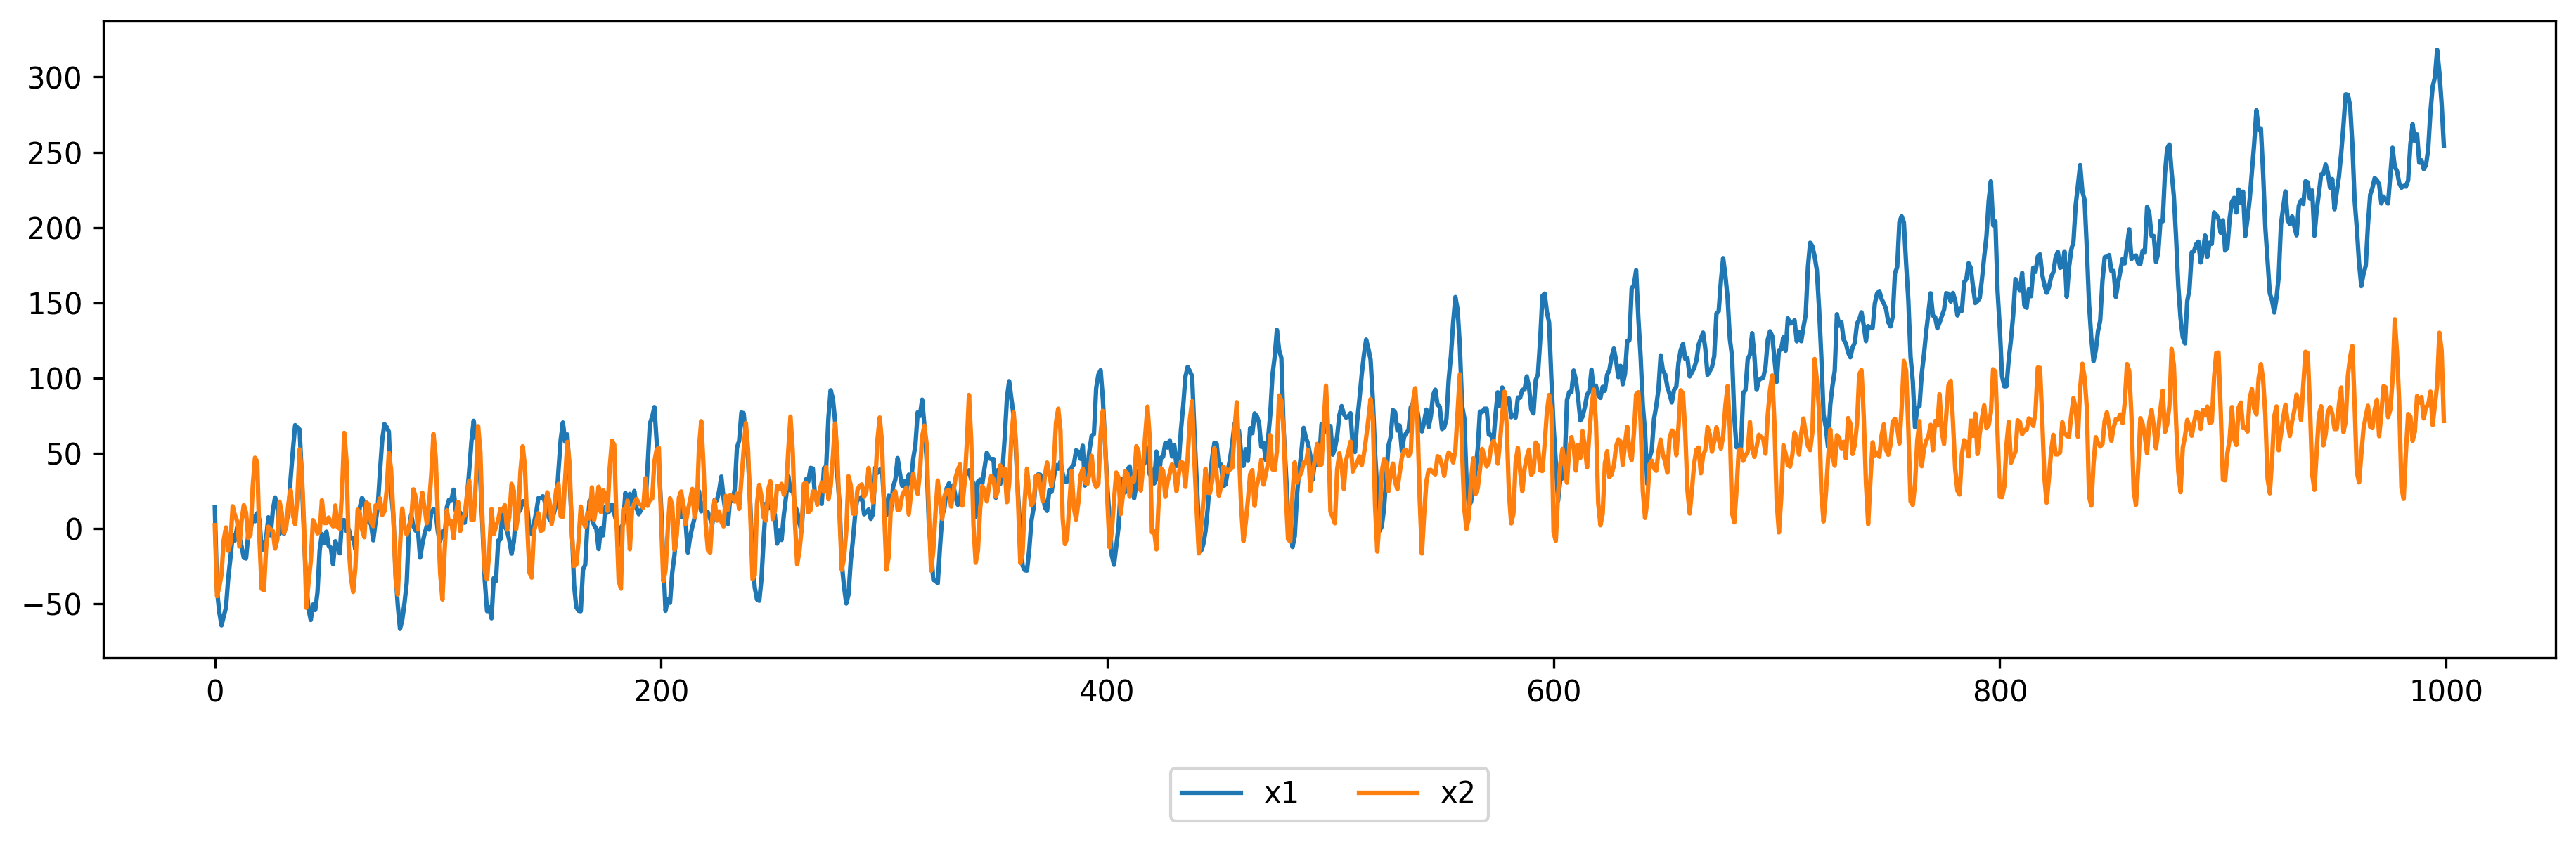

In [2]:
n_ = 1000
t = np.linspace(0, 50*np.pi, n_)
# pattern + trend + noise
x1 = sum([20*np.sin(i*t+np.pi) for i in range(5)]) + 0.01*(t**2) + np.random.normal(0, 6, n_)
x2 = sum([15*np.sin(2*i*t+np.pi) for i in range(5)]) + 0.5*t + np.random.normal(0, 6, n_)
plt.figure(figsize=(15, 4))
plt.plot(range(len(x1)), x1, label='x1')
plt.plot(range(len(x2)), x2, label='x2')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=False, ncol=2)
plt.show()

We’ve just created two sequences, x1 and x2, by combining sin waves, trend, and random noise. Next we will preprocess x1 and x2.

### Split sequences to 80% train set and 20% test set

In [3]:
train_ratio = 0.8
train_len = int(train_ratio * t.shape[0])
print(train_len)

800


Since the sequence length is n_ = 1000, the first 800 data points will be used as our train data, while the rest will be used as our test data.

### Detrending

It is not a must to detrend time series. However stationary time series will make model training much easier. There are many ways to detrend time series, such as taking difference of sequence with its lag1. Here for the simplicity, we assume the order of trend is known and we are just going to simply fit separate trend lines to x1 and x2, and then subtract the trend from the corresponding original sequence.

We will create index number of each position in the sequence, for easier detrending and trend recover.

In [4]:
x_index = np.array(range(len(t)))

Here we will use np.polyfit to complete this small task. Note that only the first 800 data points are used to fit the trend lines, this is because we want to avoid data leak.

In [5]:
x1_trend_param = np.polyfit(x_index[:train_len], x1[:train_len], 2)
x2_trend_param = np.polyfit(x_index[:train_len], x2[:train_len], 1)
print(x1_trend_param)
print(x2_trend_param)

[ 2.40620254e-04  9.62638850e-03 -2.26001762e+00]
[ 0.07999664 -0.43096449]


Based on the above values we got, we can now come up with the trend lines for x1 and x2.

In [6]:
x1_trend = (x_index**2)*x1_trend_param[0]+x_index*x1_trend_param[1]+x1_trend_param[2]
x2_trend = x_index*x2_trend_param[0]+x2_trend_param[1]

Let’s plot the trend lines together with x1 and x2, and check if they look good.

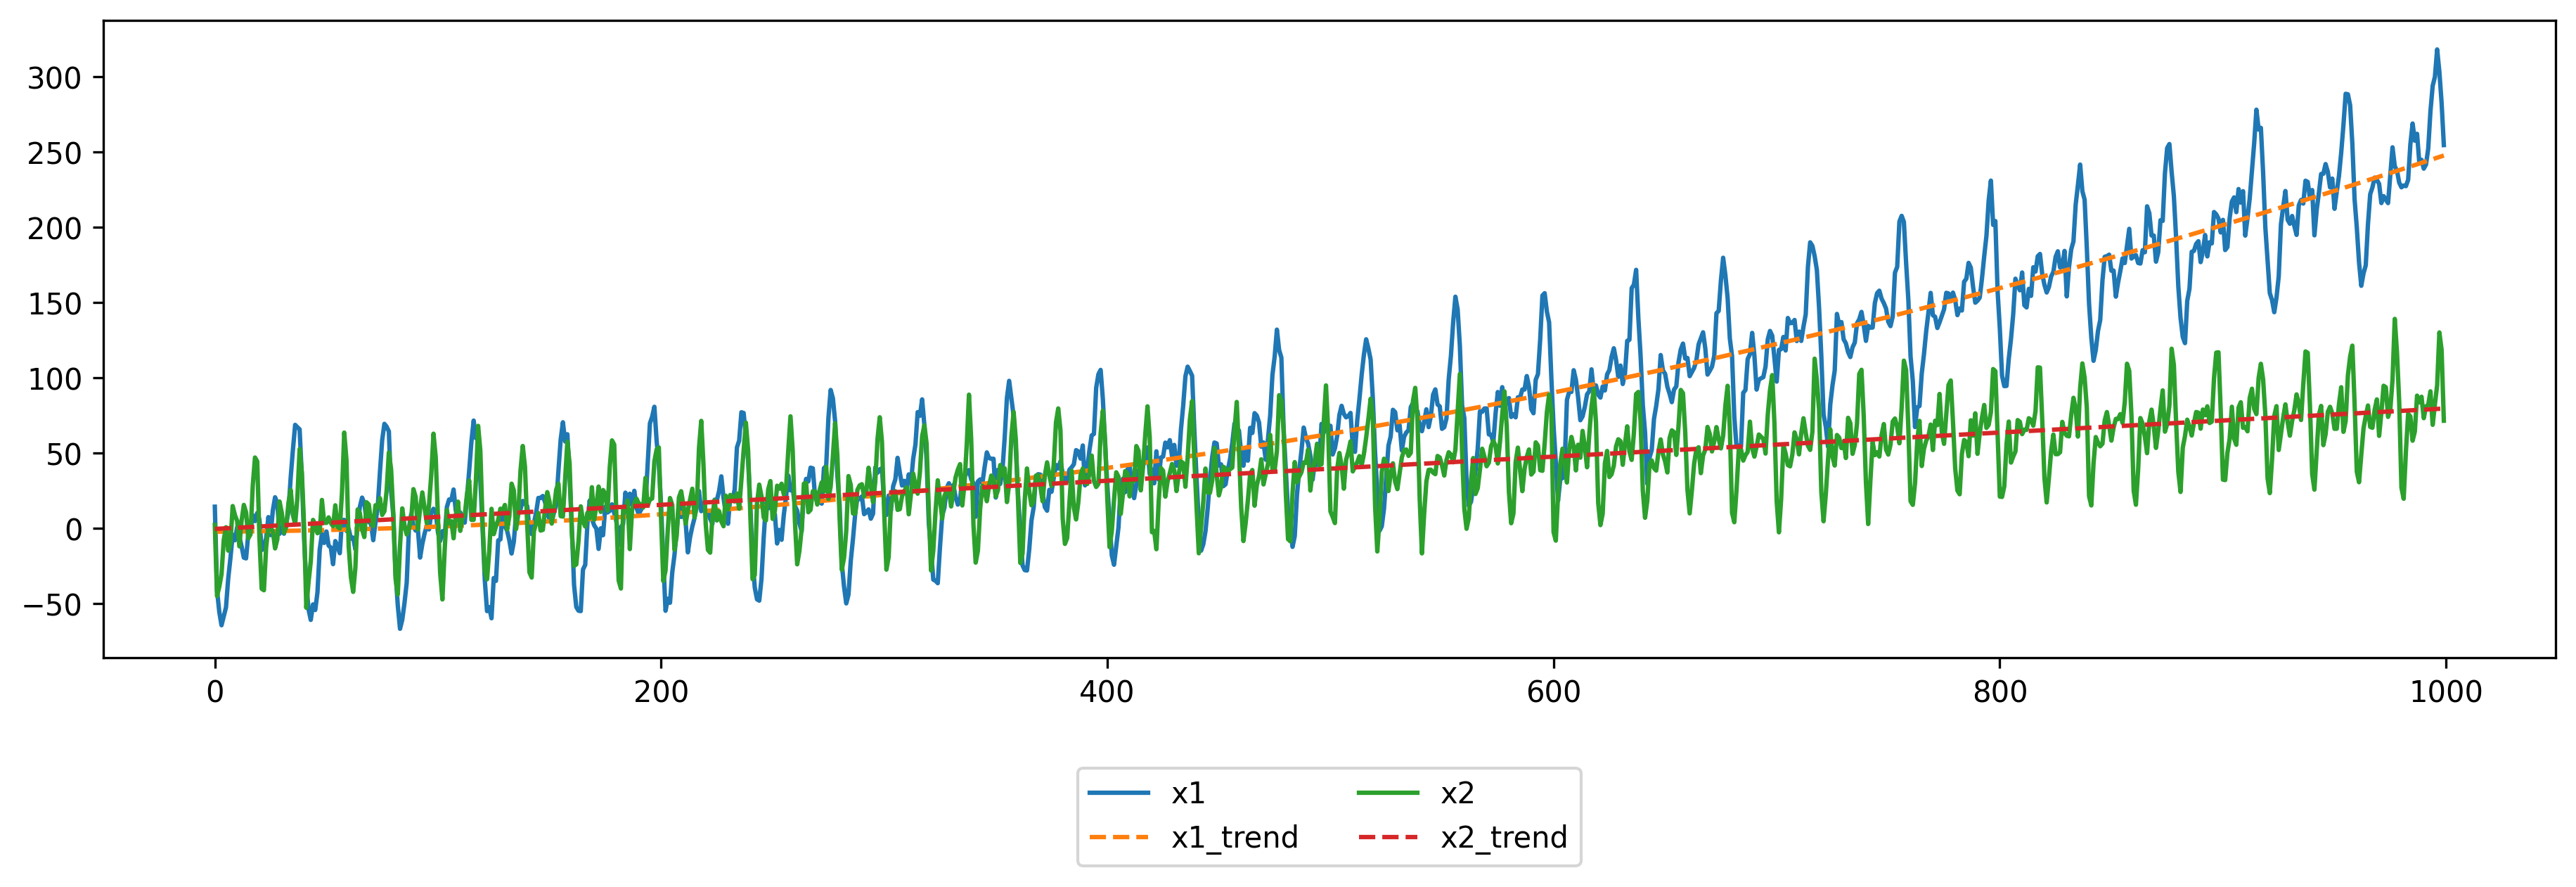

In [7]:
plt.figure(figsize=(15, 4))
plt.plot(range(len(x1)), x1, label='x1')
plt.plot(range(len(x1_trend)), x1_trend, linestyle='--', label='x1_trend')
plt.plot(range(len(x2)), x2, label='x2')
plt.plot(range(len(x2_trend)), x2_trend, linestyle='--', label='x2_trend')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=False, ncol=2)
plt.show()

The above result looks fine, now we can deduct the trend.

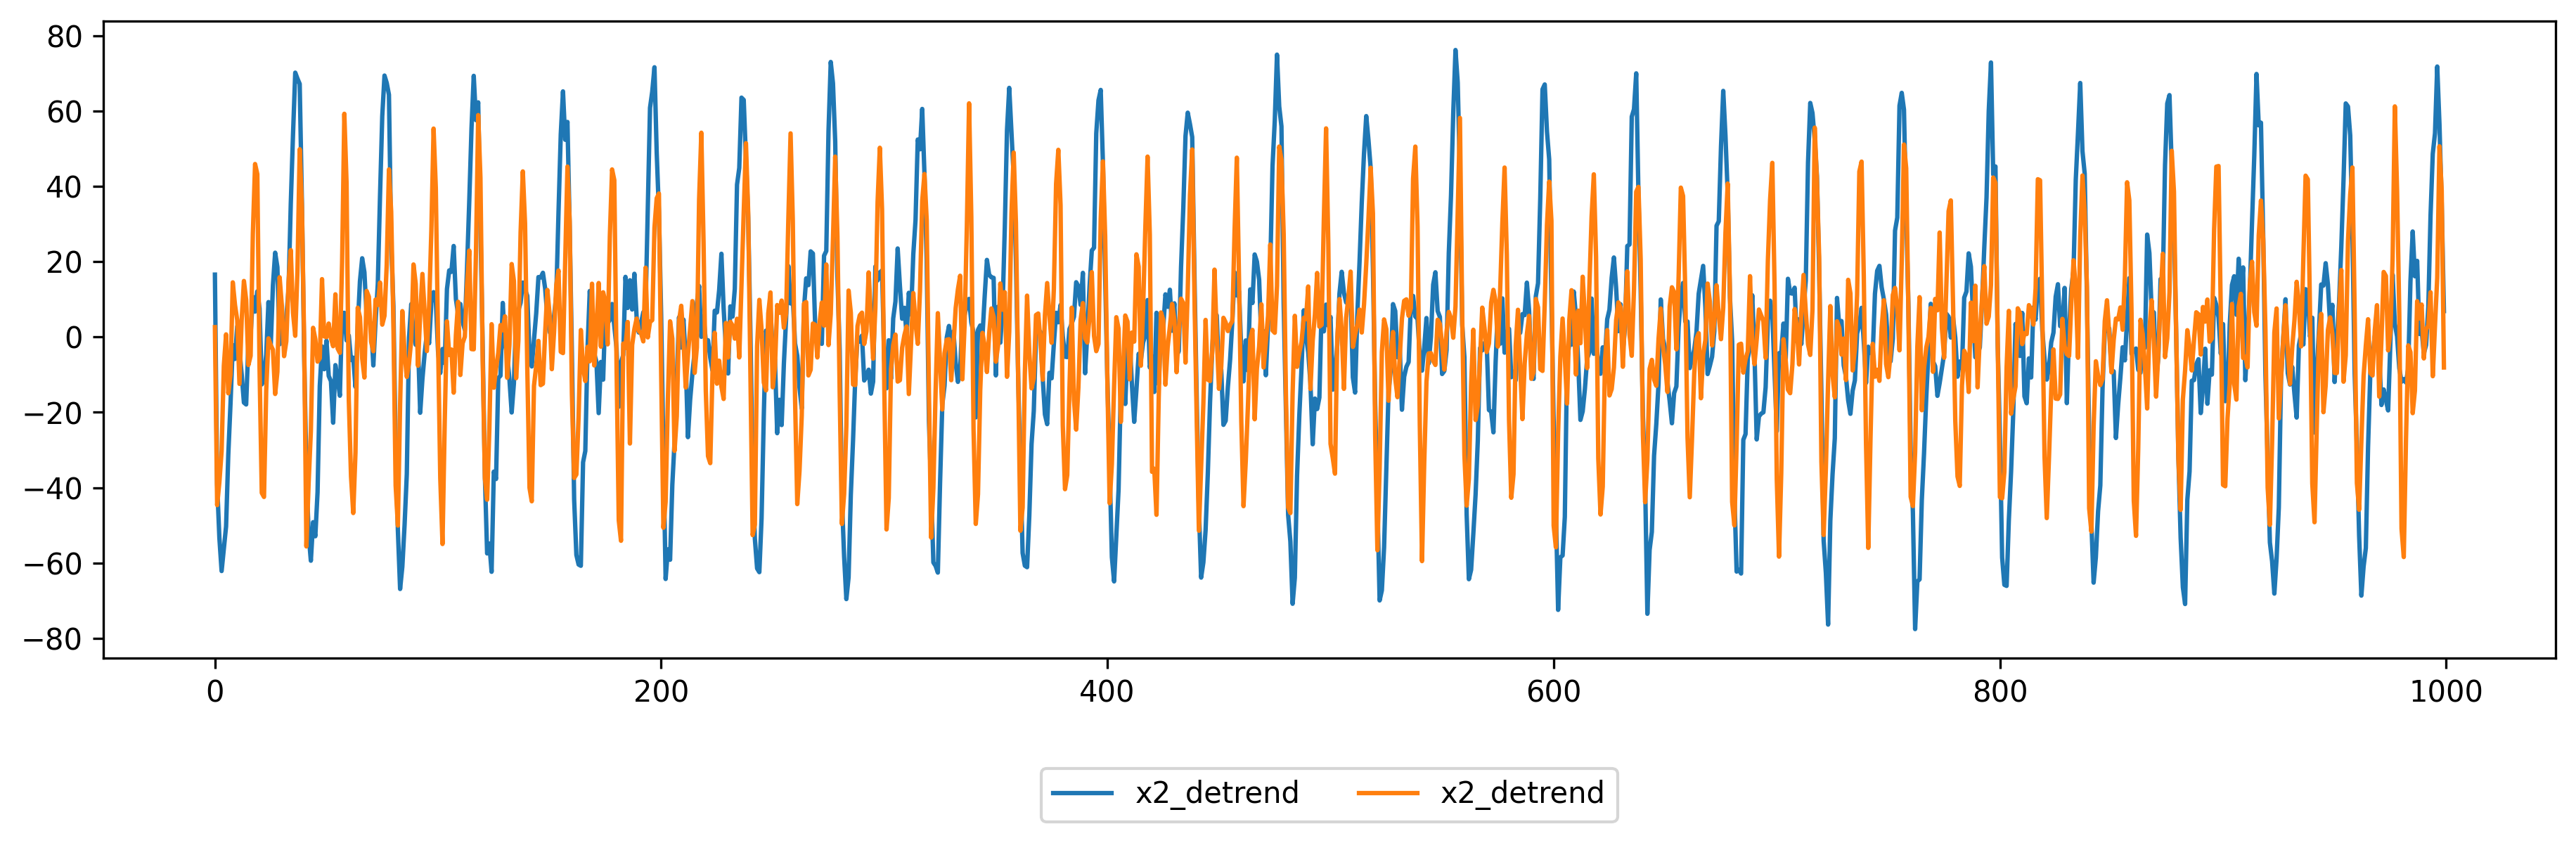

In [8]:
x1_detrend = x1 - x1_trend
x2_detrend = x2 - x2_trend
plt.figure(figsize=(15, 4))
plt.plot(range(len(x1_detrend)), x1_detrend, label='x2_detrend')
plt.plot(range(len(x2_detrend)), x2_detrend, label='x2_detrend')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=False, ncol=2)
plt.show()

After removing the trend, x1 and x2 become stationary.

### Combine sequences

For easier preprocessing in next several steps, we can combine the sequences and their relevant information together into one array.

In [9]:
x_lbl = np.column_stack([x1_detrend, x2_detrend, x_index, [1]*train_len+[0]*(len(x_index)-train_len)])
print(x_lbl.shape)
print(x_lbl)

(1000, 4)
[[ 16.59590944   2.6371045    0.           1.        ]
 [-39.00788434 -44.649165     1.           1.        ]
 [-53.34245332 -38.52694296   2.           1.        ]
 ...
 [ 56.5870035   50.69270168 997.           0.        ]
 [ 35.40142771  38.92631558 998.           0.        ]
 [  6.90622671  -8.07902715 999.           0.        ]]


In the combined array we created x_lbl:
 - the first column is the detrended x1
 - the second column is the detrended x2
 - the third column is the index
 - the fourth column is the label (1 for train set and 0 for test set)


### Normalize

Normalisation can help model avoid favouring large features while ignoring very small features. Here we can just simply normalise x1 and x2 by dividing the corresponding maximum values in train set.

In [10]:
x_train_max = x_lbl[x_lbl[:, 3]==1, :2].max(axis=0)
x_train_max = x_train_max.tolist()+[1]*2  # only normalize for the first 2 columns
print(x_train_max)

[76.27514247988307, 62.10462192838826, 1, 1]


Note that the above code only calculates maximum value of column 1 (detrended x1) and column 2 (detrended x2), the denominator of column 3 (index) and column 4 (label) are set to 1. This is because we do not input column 3 and column 4 into neural network, and hence no need to normalise them.

In [11]:
x_normalize = np.divide(x_lbl, x_train_max)
print(x_normalize)

[[ 2.17579527e-01  4.24622905e-02  0.00000000e+00  1.00000000e+00]
 [-5.11410180e-01 -7.18934656e-01  1.00000000e+00  1.00000000e+00]
 [-6.99342559e-01 -6.20355487e-01  2.00000000e+00  1.00000000e+00]
 ...
 [ 7.41880010e-01  8.16246844e-01  9.97000000e+02  0.00000000e+00]
 [ 4.64127979e-01  6.26786129e-01  9.98000000e+02  0.00000000e+00]
 [ 9.05436094e-02 -1.30087374e-01  9.99000000e+02  0.00000000e+00]]


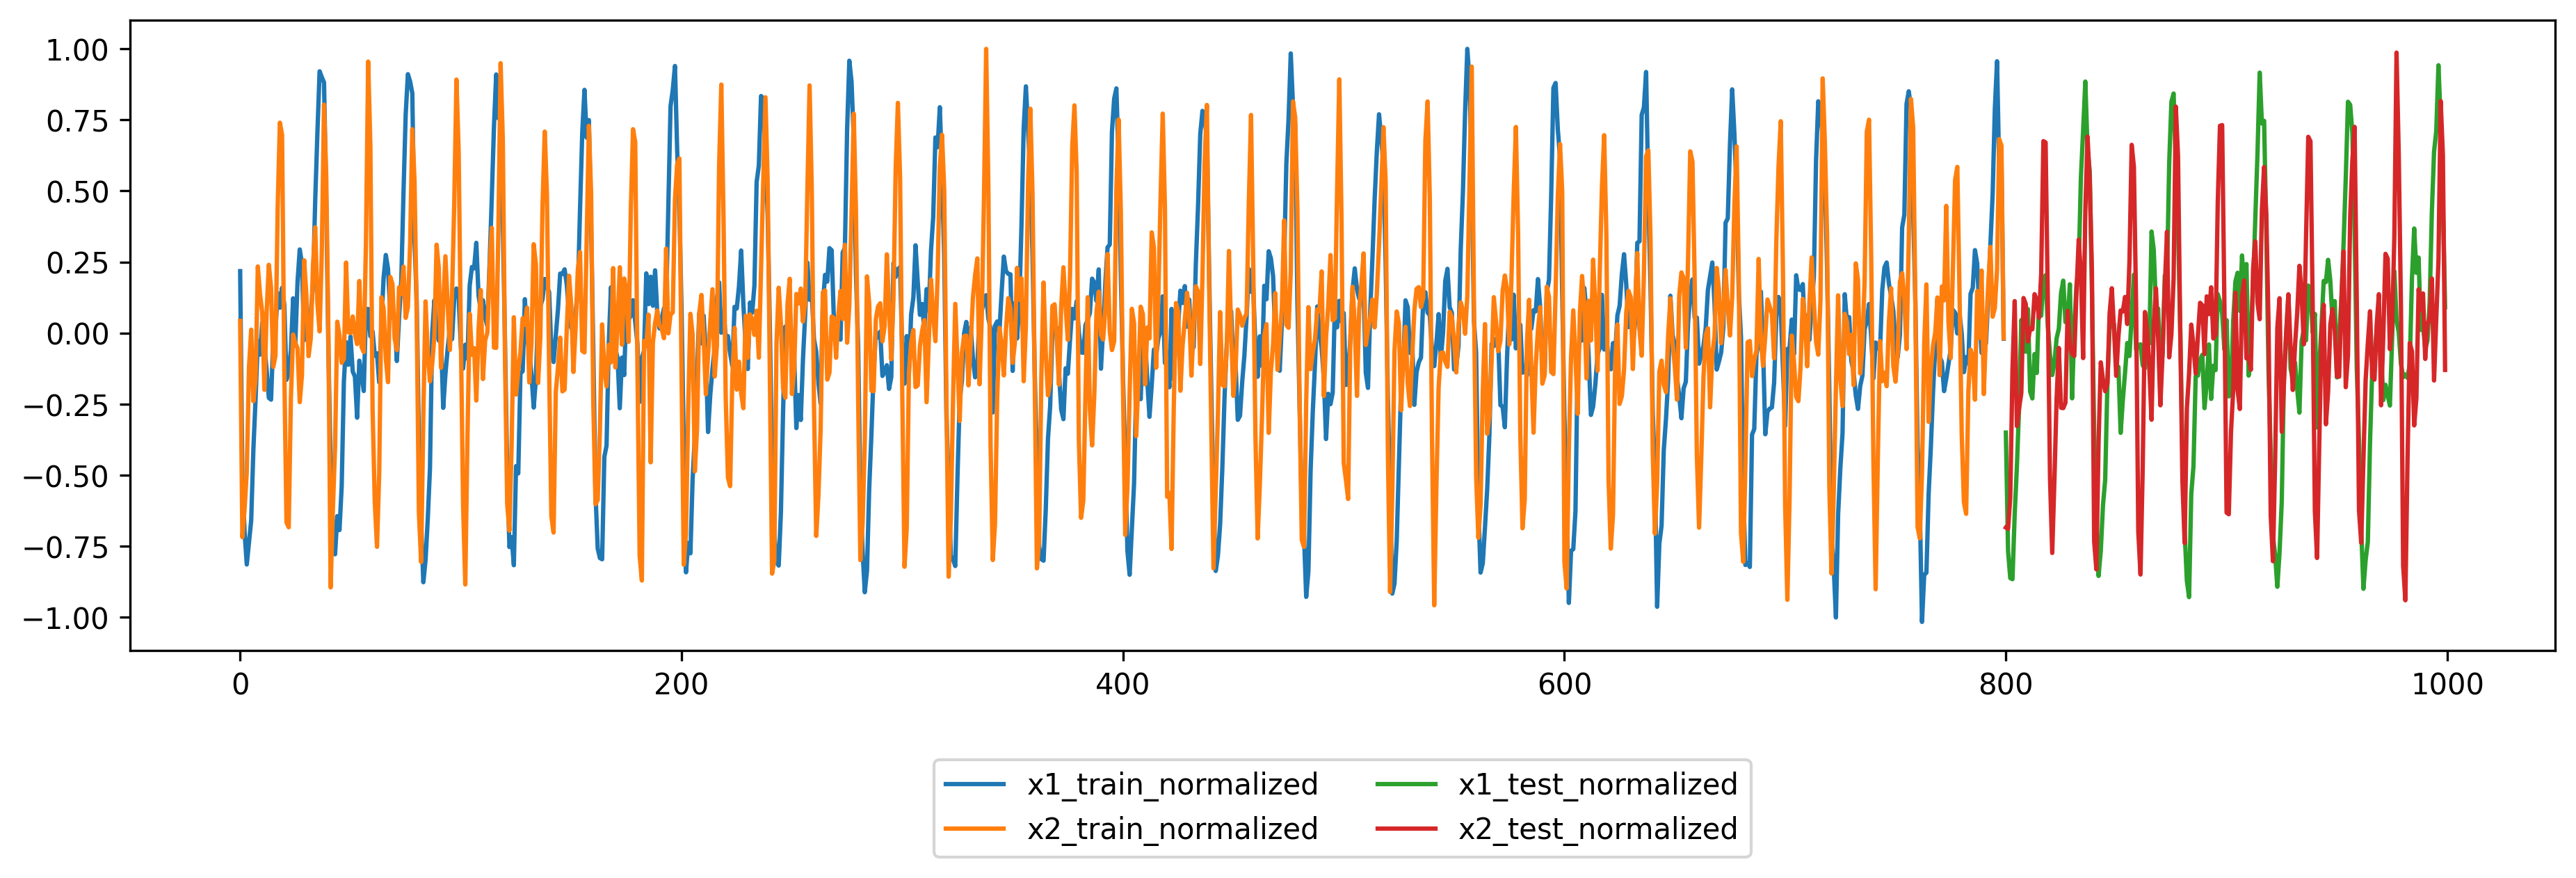

In [12]:
plt.figure(figsize=(15, 4))
plt.plot(range(train_len), x_normalize[:train_len, 0], label='x1_train_normalized')
plt.plot(range(train_len), x_normalize[:train_len, 1], label='x2_train_normalized')
plt.plot(range(train_len, len(x_normalize)), x_normalize[train_len:, 0], label='x1_test_normalized')
plt.plot(range(train_len, len(x_normalize)), x_normalize[train_len:, 1], label='x2_test_normalized')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=False, ncol=2)
plt.show()

After normalisation, all the values are more or less within range from -1 to 1.

### Truncate

Next, we will cut sequence into smaller pieces by sliding an input window (length = 200 time steps) and an output window (length = 20 time steps), and put these samples in 3d numpy arrays.

![](resources/04_fig1.png "dsfg")

In [13]:
def truncate(x, feature_cols=range(3), target_cols=range(3), label_col=3, train_len=100, test_len=20):
    in_, out_, lbl = [], [], []
    for i in range(len(x)-train_len-test_len+1):
        in_.append(x[i:(i+train_len), feature_cols].tolist())
        out_.append(x[(i+train_len):(i+train_len+test_len), target_cols].tolist())
        lbl.append(x[i+train_len, label_col])
    return np.array(in_), np.array(out_), np.array(lbl)
X_in, X_out, lbl = truncate(x_normalize, feature_cols=range(3), target_cols=range(3), 
                            label_col=3, train_len=200, test_len=20)
print(X_in.shape, X_out.shape, lbl.shape)

(781, 200, 3) (781, 20, 3) (781,)


The function truncate generates 3 arrays:
 - input to neural network X_in: it contains 781 samples, length of each sample is 200 time steps, and each sample contains 3 features: detrended and normalised x1, detrended and normalised x2, and original assigned data position index. Only the first 2 features will be used for training.
 - target in neural network X_out: it contains 781 samples, length of each sample is 20 time steps, and each sample contains the same 3 features as in X_in. Only the first 2 features will be used as target, and the third feature will only be used to recover trend of the prediction.
 - label lbl: 1 for train set and 0 for test set.

In [14]:
X_input_train = X_in[np.where(lbl==1)]
X_output_train = X_out[np.where(lbl==1)]
X_input_test = X_in[np.where(lbl==0)]
X_output_test = X_out[np.where(lbl==0)]
print(X_input_train.shape, X_output_train.shape)
print(X_input_test.shape, X_output_test.shape)

(600, 200, 3) (600, 20, 3)
(181, 200, 3) (181, 20, 3)


Now the data is ready to be input into neural network!

## Simple Seq2Seq LSTM Model

![](resources/04_fig2.png)

The above figure represents unfolded single layer of Seq2Seq LSTM model:
 - The encoder LSTM cell: The value of each time step is input into the encoder LSTM cell together with previous cell state c and hidden state h, the process repeats until the last cell state c and hidden state h are generated.
 - The decoder LSTM cell: We use the last cell state c and hidden state h from the encoder as the initial states of the decoder LSTM cell. The last hidden state of encoder is also copied 20 times, and each copy is input into the decoder LSTM cell together with previous cell state c and hidden state h. The decoder outputs hidden state for all the 20 time steps, and these hidden states are connected to a dense layer to output the final result.

Set number of hidden layers:

In [15]:
n_hidden = 100

### The input layer

In [16]:
def get_input_layers():
    in_train = layers.Input(shape=(X_input_train.shape[1], X_input_train.shape[2]-1))
    out_train = layers.Input(shape=(X_output_train.shape[1], X_output_train.shape[2]-1))
   
    return in_train, out_train

seq2seq_input_train, seq2seq_output_train = get_input_layers()

print(seq2seq_input_train)
print(seq2seq_output_train)

KerasTensor(type_spec=TensorSpec(shape=(None, 200, 2), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 20, 2), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")


### The encoder LSTM

We need to pay attention to 2 import parameters return_sequences and return_state, because they decide what LSTM returns.
 - return_sequences=False, return_state=False: return the last hidden state: state_h
 - return_sequences=True, return_state=False: return stacked hidden states (num_timesteps * num_cells): one hidden state output for each input time step
 - return_sequences=False, return_state=True: return 3 arrays: state_h, state_h, state_c
 - return_sequences=True, return_state=True: return 3 arrays: stacked hidden states, last state_h, last state_c

For simple Seq2Seq model, we only need last state_h and last state_c.

In [17]:
def get_encoder(in_train, ret_seq=True, ret_st=True):
    out1, out2, out3 = layers.LSTM(n_hidden, activation='elu', dropout=0.2, 
                                   recurrent_dropout=0.2, 
                                   return_sequences=ret_seq, 
                                   return_state=ret_st)(in_train)
    
    print('out1:', out1)
    print('out2:', out2)
    print('out3:', out3)
    
    batch1_in = out2 if ret_seq else out1
    
    encoder_last_h = layers.BatchNormalization(momentum=0.6)(batch1_in)
    encoder_last_c = layers.BatchNormalization(momentum=0.6)(out3)

    return encoder_last_h, encoder_last_c, out1


seq2seq_encoder_last_h, seq2seq_encoder_last_c, _ = get_encoder(seq2seq_input_train)

out1: KerasTensor(type_spec=TensorSpec(shape=(None, 200, 100), dtype=tf.float32, name=None), name='lstm/transpose_1:0', description="created by layer 'lstm'")
out2: KerasTensor(type_spec=TensorSpec(shape=(None, 100), dtype=tf.float32, name=None), name='lstm/while:4', description="created by layer 'lstm'")
out3: KerasTensor(type_spec=TensorSpec(shape=(None, 100), dtype=tf.float32, name=None), name='lstm/while:5', description="created by layer 'lstm'")


Batch normalisation is added because we want to avoid gradient explosion caused by the activation function ELU in the encoder.

### Decoder

Next, we make 20 copies of the last hidden state of encoder and use them as input to the decoder. The last cell state and the last hidden state of the encoder are also used as the initial states of decoder.

In [21]:
def get_decoder(output_train, encoder_h, encoder_c):
    decoder = layers.RepeatVector(output_train.shape[1])(encoder_h)
    decoder = layers.LSTM(n_hidden, activation='elu', dropout=0.2, 
                          recurrent_dropout=0.2, return_state=False, 
                          return_sequences=True)(decoder, 
                                                 initial_state=[encoder_h, 
                                                                encoder_c])
    print('decoder:', decoder)
    return decoder

seq2seq_decoder = get_decoder(seq2seq_output_train, 
                              seq2seq_encoder_last_h, 
                              seq2seq_encoder_last_c)

seq2seq_out = layers.TimeDistributed(layers.Dense(seq2seq_output_train.shape[2]))(seq2seq_decoder)
print('out:', seq2seq_out)

decoder: KerasTensor(type_spec=TensorSpec(shape=(None, 20, 100), dtype=tf.float32, name=None), name='lstm_3/transpose_1:0', description="created by layer 'lstm_3'")
out: KerasTensor(type_spec=TensorSpec(shape=(None, 20, 2), dtype=tf.float32, name=None), name='time_distributed_1/Reshape_1:0', description="created by layer 'time_distributed_1'")


### Model building

Then we put everything into the model, and compile it. Here we simply use MSE as the loss function and MAE as the evaluation metric. Note that we set clipnorm=1 for Adam optimiser. This is to normalise the gradient, so as to avoid gradient explosion during back propagation.

In [22]:
seq2seq_model = Model(inputs=seq2seq_input_train, outputs=seq2seq_out)
seq2seq_opt = optimizers.Adam(learning_rate=0.01, clipnorm=1)
seq2seq_model.compile(loss='mean_squared_error', optimizer=seq2seq_opt, metrics=['mae'])
seq2seq_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 2)]     0           []                               
                                                                                                  
 lstm (LSTM)                    [(None, 200, 100),   41200       ['input_1[0][0]']                
                                 (None, 100),                                                     
                                 (None, 100)]                                                     
                                                                                                  
 batch_normalization (BatchNorm  (None, 100)         400         ['lstm[0][1]']                   
 alization)                                                                                   

We can also plot the model:

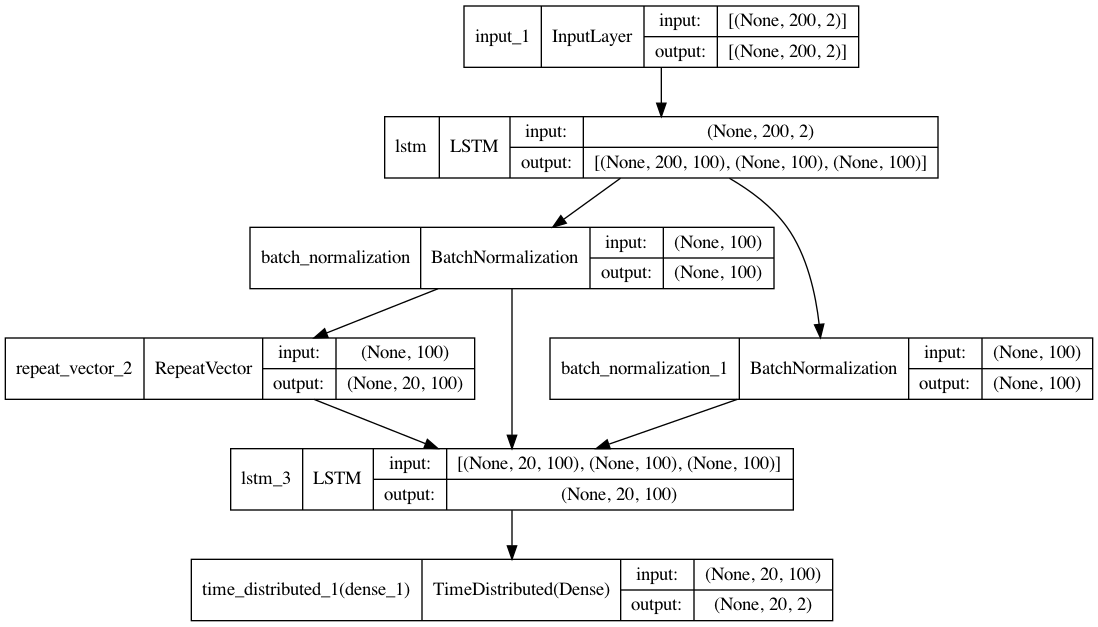

In [23]:
plot_model(seq2seq_model, to_file='data/seq2seq_model_plot.png', show_shapes=True, show_layer_names=True)

###  Training

Epoch 1/50
5/5 [==============================] - 10s 826ms/step - loss: 6.4774 - mae: 1.1229 - val_loss: 0.1467 - val_mae: 0.2824
Epoch 2/50
5/5 [==============================] - 3s 690ms/step - loss: 0.1913 - mae: 0.3375 - val_loss: 0.1434 - val_mae: 0.2778
Epoch 3/50
5/5 [==============================] - 3s 659ms/step - loss: 0.1389 - mae: 0.2782 - val_loss: 0.1320 - val_mae: 0.2675
Epoch 4/50
5/5 [==============================] - 3s 636ms/step - loss: 0.1260 - mae: 0.2626 - val_loss: 0.1226 - val_mae: 0.2559
Epoch 5/50
5/5 [==============================] - 3s 540ms/step - loss: 0.1179 - mae: 0.2527 - val_loss: 0.1110 - val_mae: 0.2466
Epoch 6/50
5/5 [==============================] - 3s 549ms/step - loss: 0.1142 - mae: 0.2502 - val_loss: 0.1065 - val_mae: 0.2435
Epoch 7/50
5/5 [==============================] - 3s 504ms/step - loss: 0.1087 - mae: 0.2449 - val_loss: 0.0972 - val_mae: 0.2340
Epoch 8/50
5/5 [==============================] - 3s 508ms/step - loss: 0.1026 - mae: 0.2

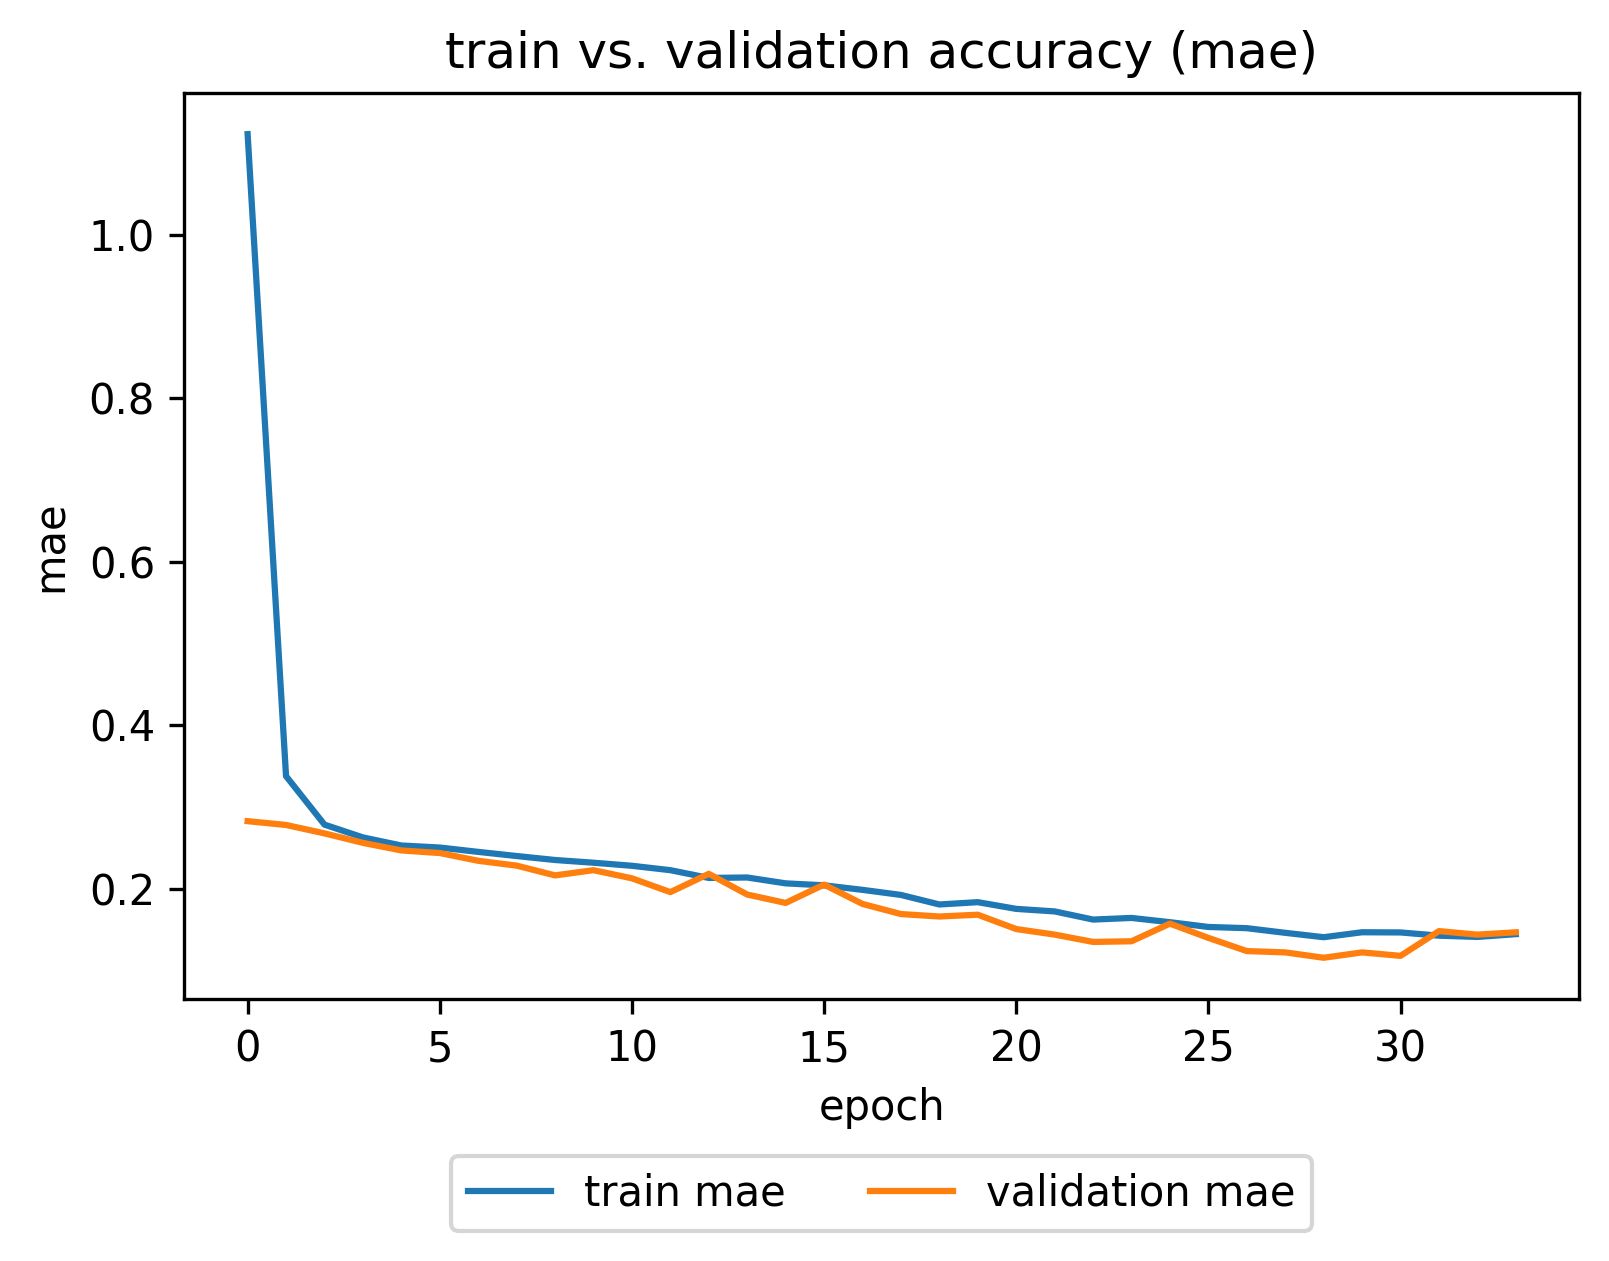

In [24]:
epc = 50
es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = seq2seq_model.fit(X_input_train[:, :, :2], X_output_train[:, :, :2], 
                            validation_split=0.2, epochs=epc, verbose=1, 
                            callbacks=[es], batch_size=100)
seq2seq_train_mae = history.history['mae']
seq2seq_valid_mae = history.history['val_mae']
 
seq2seq_model.save('data/model_forecasting_seq2seq.h5')

plt.plot(seq2seq_train_mae, label='train mae'), 
plt.plot(seq2seq_valid_mae, label='validation mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.title('train vs. validation accuracy (mae)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, 
           shadow=False, ncol=2)
plt.show()

### Prediction (evaluation)

1. The model prediction as well as the true values are unnormalised:
1. Then we combine the unnormalised outputs with their corresponding index, so that we can recover the trend.
1. Next, we put all the outputs with recovered trend into a dictionary data_final.

Let's put all this in a function to be used in the next model evaluation.

In [25]:
def check_predictions(model):
    # 1.
    train_pred_detrend = model.predict(X_input_train[:, :, :2])*x_train_max[:2]
    test_pred_detrend = model.predict(X_input_test[:, :, :2])*x_train_max[:2]
    print(train_pred_detrend.shape, test_pred_detrend.shape)

    train_true_detrend = X_output_train[:, :, :2]*x_train_max[:2]
    test_true_detrend = X_output_test[:, :, :2]*x_train_max[:2]
    print(train_true_detrend.shape, test_true_detrend.shape)
    
    # 2.
    train_pred_detrend = np.concatenate([train_pred_detrend, 
                                         np.expand_dims(X_output_train[:, :, 2], 
                                                        axis=2)
                                        ], axis=2)
    test_pred_detrend = np.concatenate([test_pred_detrend, 
                                        np.expand_dims(X_output_test[:, :, 2], 
                                                       axis=2)
                                       ], axis=2)
    print(train_pred_detrend.shape, test_pred_detrend.shape)

    train_true_detrend = np.concatenate([train_true_detrend, 
                                         np.expand_dims(X_output_train[:, :, 2], 
                                                        axis=2)
                                        ], axis=2)
    test_true_detrend = np.concatenate([test_true_detrend, 
                                        np.expand_dims(X_output_test[:, :, 2], 
                                                       axis=2)
                                       ], axis=2)
    print(train_true_detrend.shape, test_true_detrend.shape)
    
    # 3.
    data_final = dict()
    for dt, lb in zip([train_pred_detrend, train_true_detrend, 
                       test_pred_detrend, test_true_detrend], 
                      ['train_pred', 'train_true', 'test_pred', 'test_true']):
        dt_x1 = dt[:, :, 0] + (dt[:, :, 2]**2)*x1_trend_param[0] + dt[:, :, 2]*x1_trend_param[1] + x1_trend_param[2]
        dt_x2 = dt[:, :, 1] + dt[:, :, 2]*x2_trend_param[0] + x2_trend_param[1]
        data_final[lb] = np.concatenate(
            [np.expand_dims(dt_x1, axis=2), np.expand_dims(dt_x2, axis=2)], axis=2)
        print(lb+': {}'.format(data_final[lb].shape))
        
    return data_final

In [26]:
seq2seq_data_final = check_predictions(seq2seq_model)

(600, 20, 2) (181, 20, 2)
(600, 20, 2) (181, 20, 2)
(600, 20, 3) (181, 20, 3)
(600, 20, 3) (181, 20, 3)
train_pred: (600, 20, 2)
train_true: (600, 20, 2)
test_pred: (181, 20, 2)
test_true: (181, 20, 2)


Just a quick check to see if the prediction value distribution is reasonable:

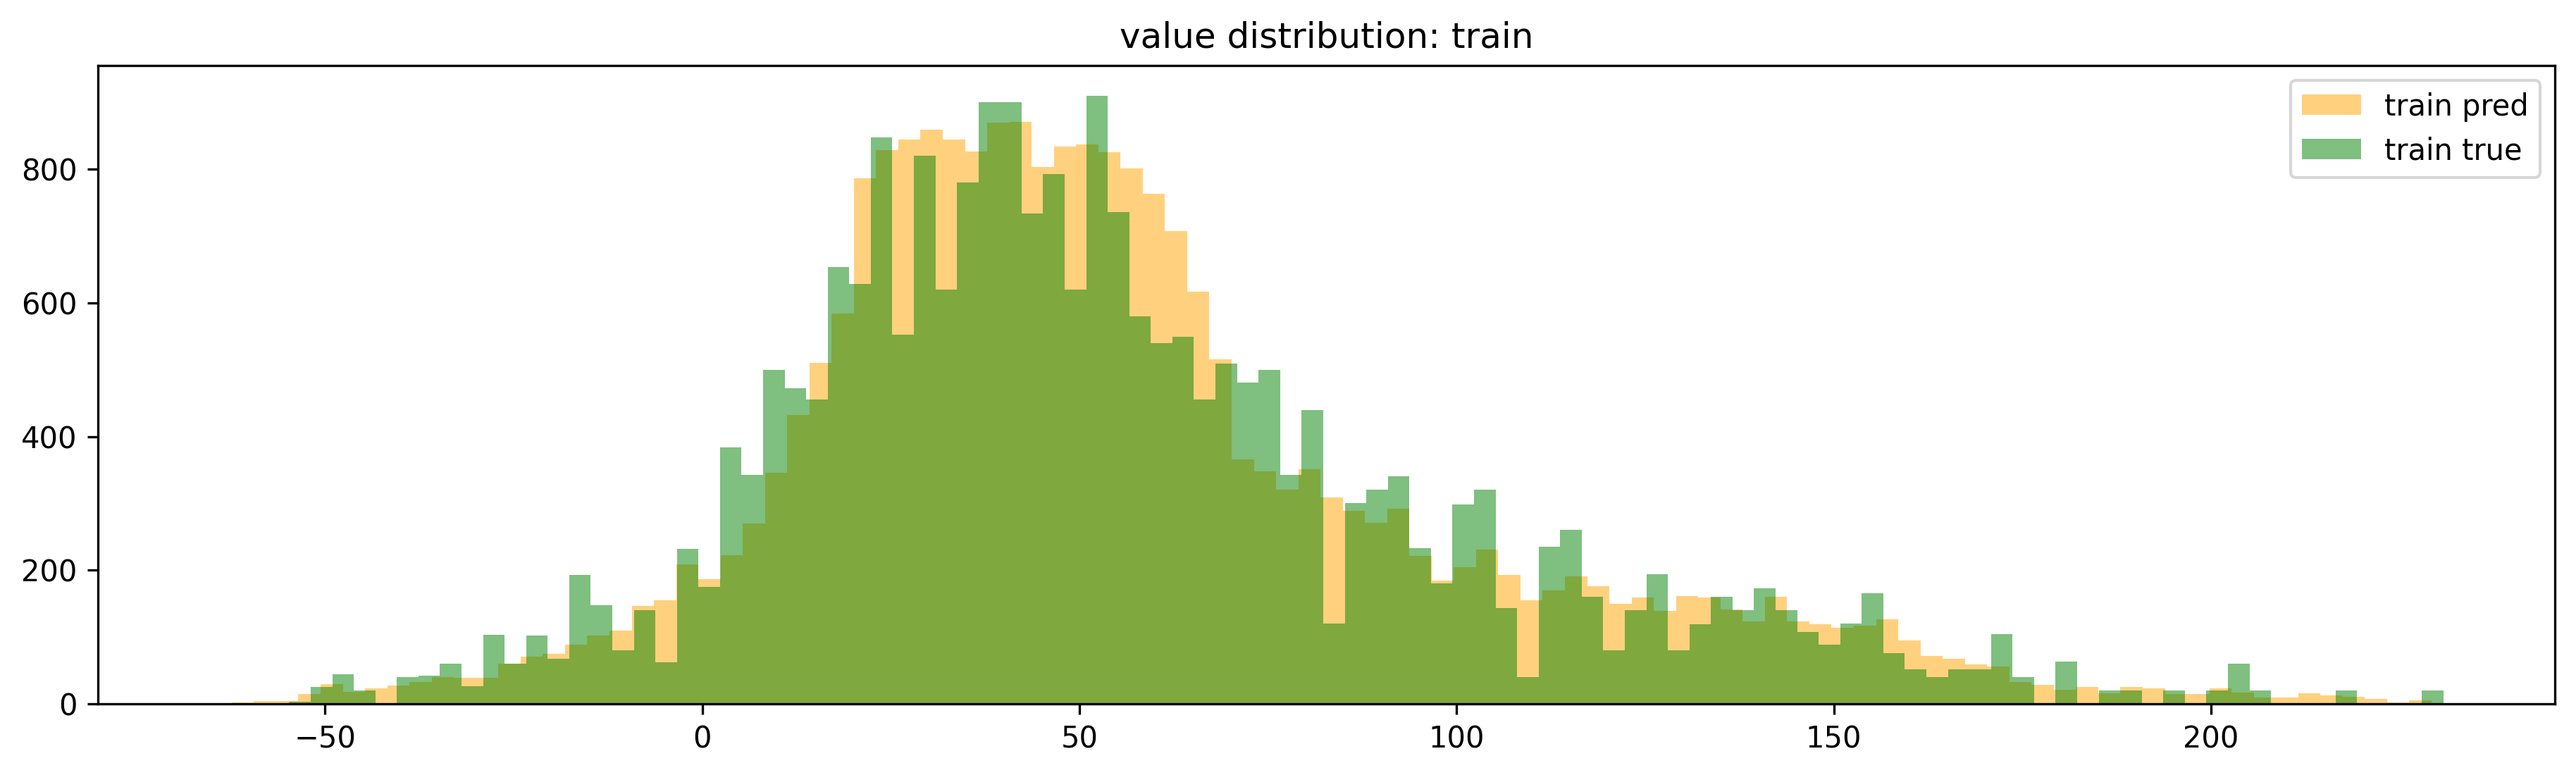

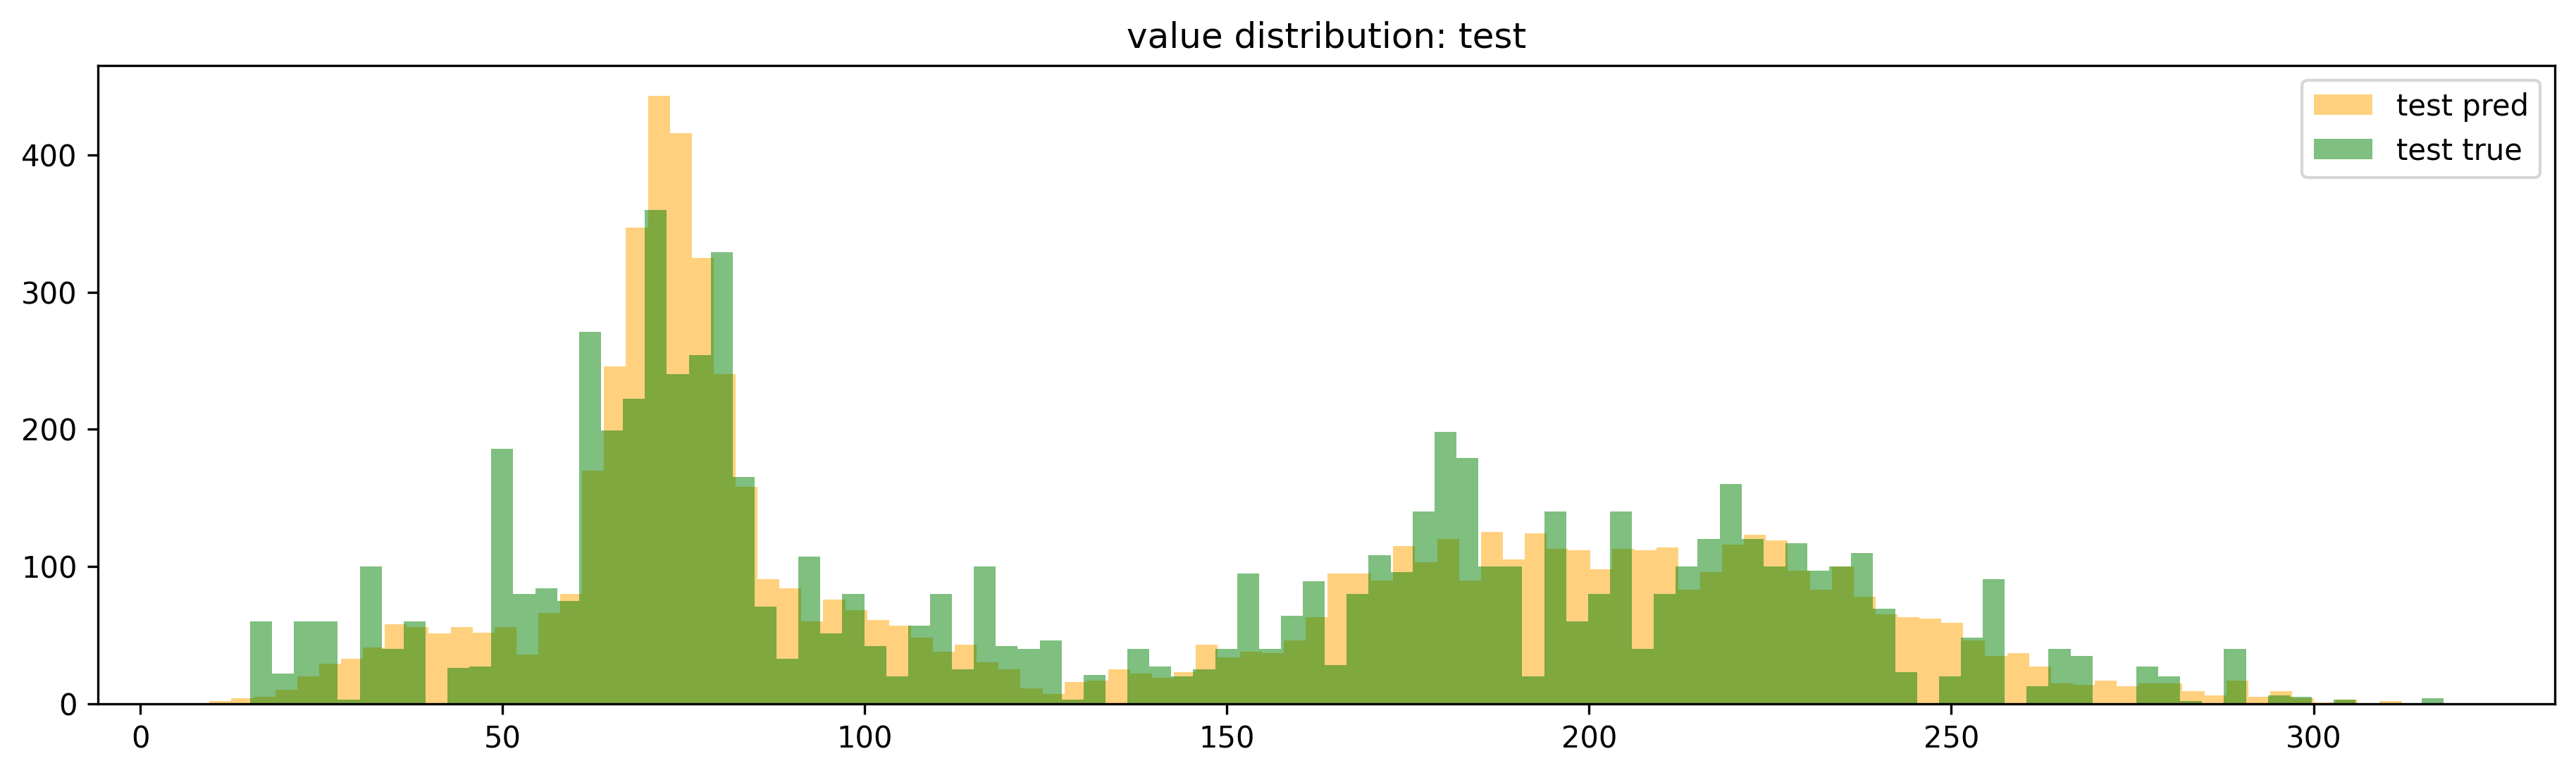

In [27]:
for lb in ['train', 'test']:
    plt.figure(figsize=(15, 4))
    plt.hist(seq2seq_data_final[lb+'_pred'].flatten(), bins=100, color='orange', 
             alpha=0.5, label=lb+' pred')
    plt.hist(seq2seq_data_final[lb+'_true'].flatten(), bins=100, color='green', 
             alpha=0.5, label=lb+' true')
    plt.legend()
    plt.title('value distribution: '+lb)
    plt.show()

The data distribution of prediction and true values are almost overlapped, so we are good.

We can also plot MAE of all samples in time order, to see if there is clear pattern. The ideal situation is when line is random, otherwise it may indicate that the model is not sufficiently trained.

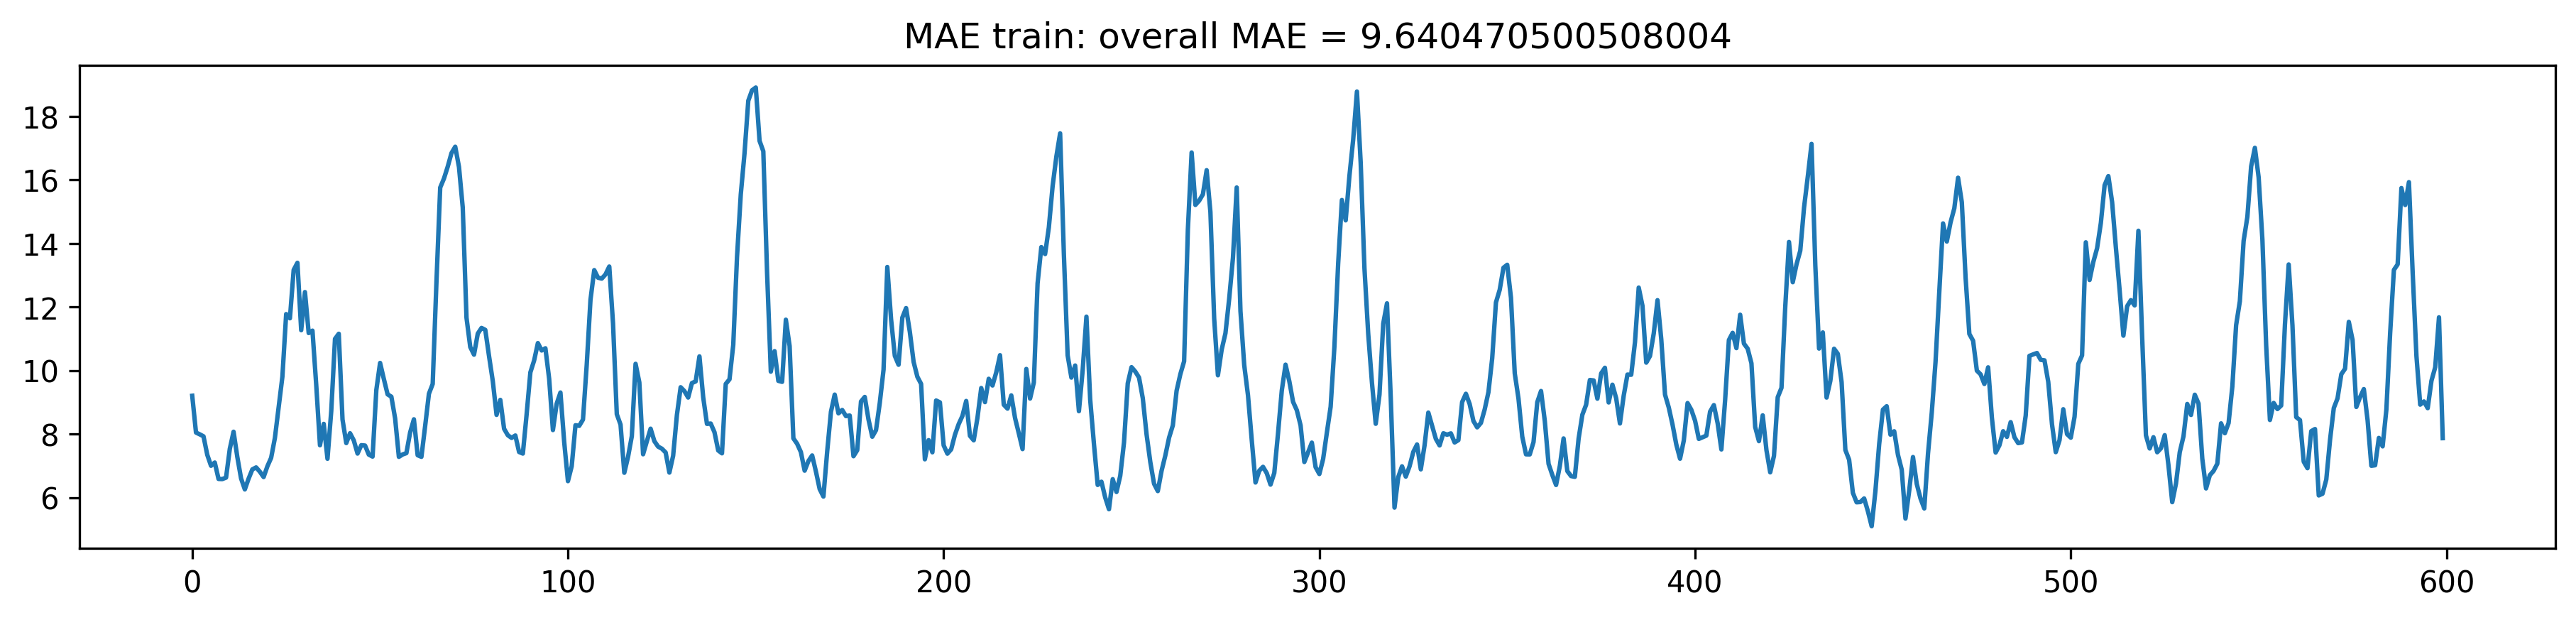

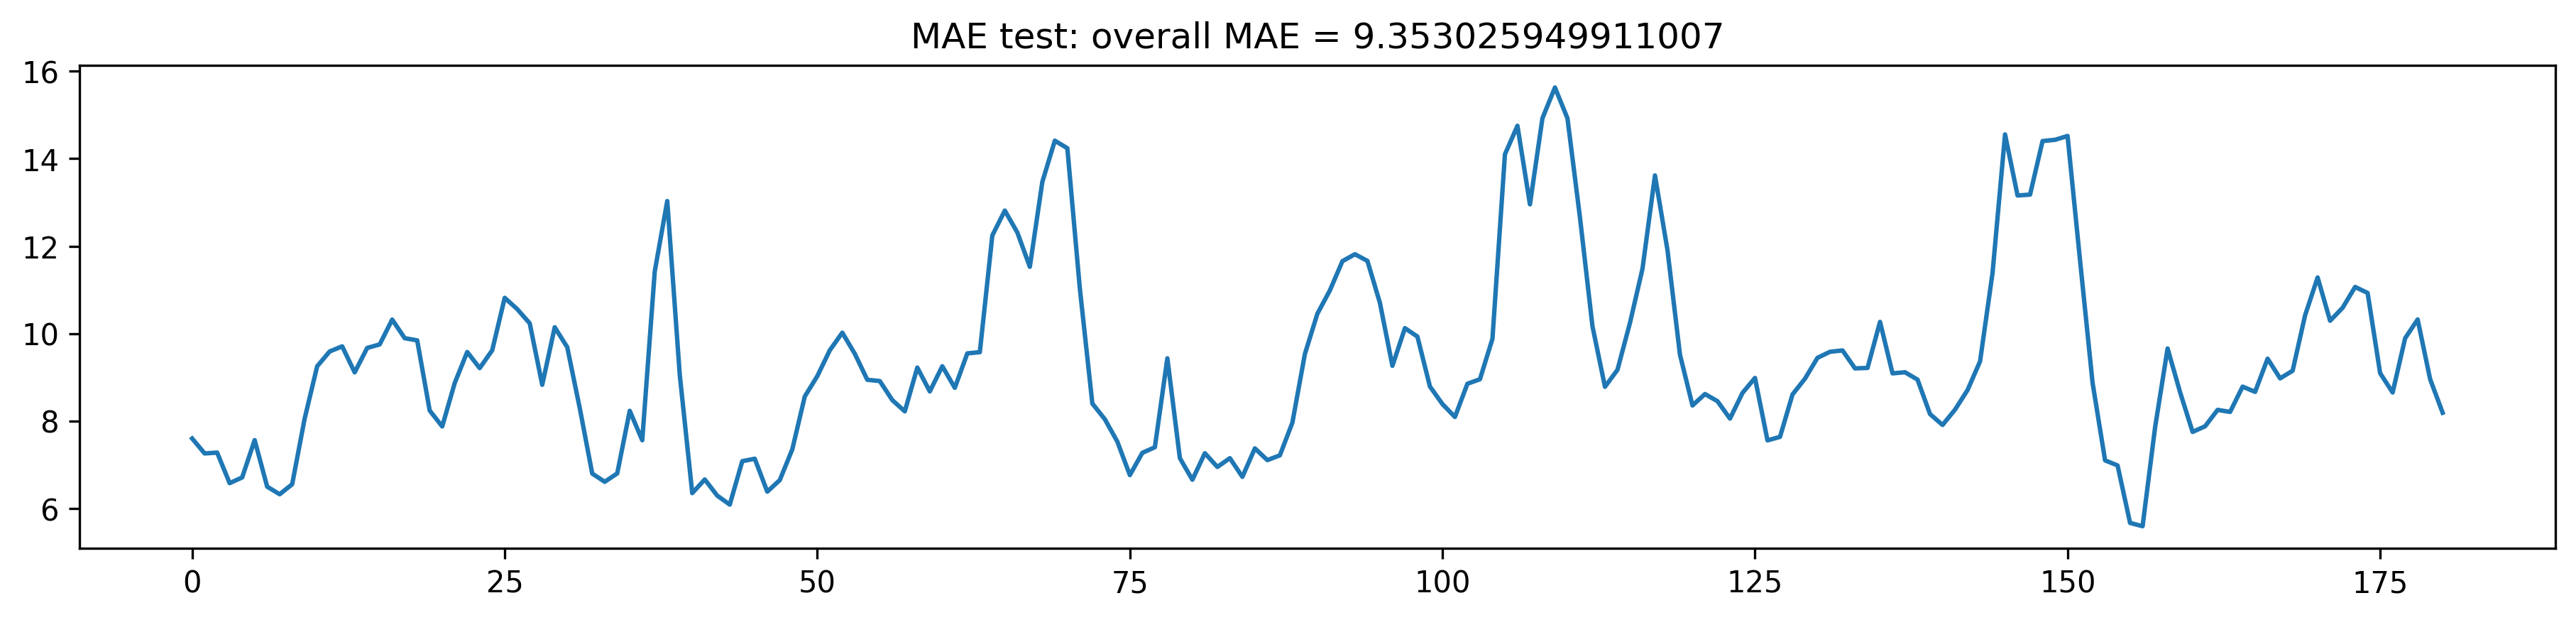

In [28]:
for lb in ['train', 'test']:
    MAE_overall = abs(seq2seq_data_final[lb+'_pred'] - seq2seq_data_final[lb+'_true']).mean()
    MAE_ = abs(seq2seq_data_final[lb+'_pred'] - seq2seq_data_final[lb+'_true']).mean(axis=(1, 2))
    plt.figure(figsize=(15, 3))
    plt.plot(MAE_)
    plt.title('MAE '+lb+': overall MAE = '+str(MAE_overall))
    plt.show()

Based on the above plots, we can say that there are still certain periodical pattens in both train and test MAE. Training for more epochs may lead to better results.

Next we are going to check some random samples and see if the predicted lines and corresponding true lines are aligned. (184th and 37th)

We can also check the nth prediction of each time step:

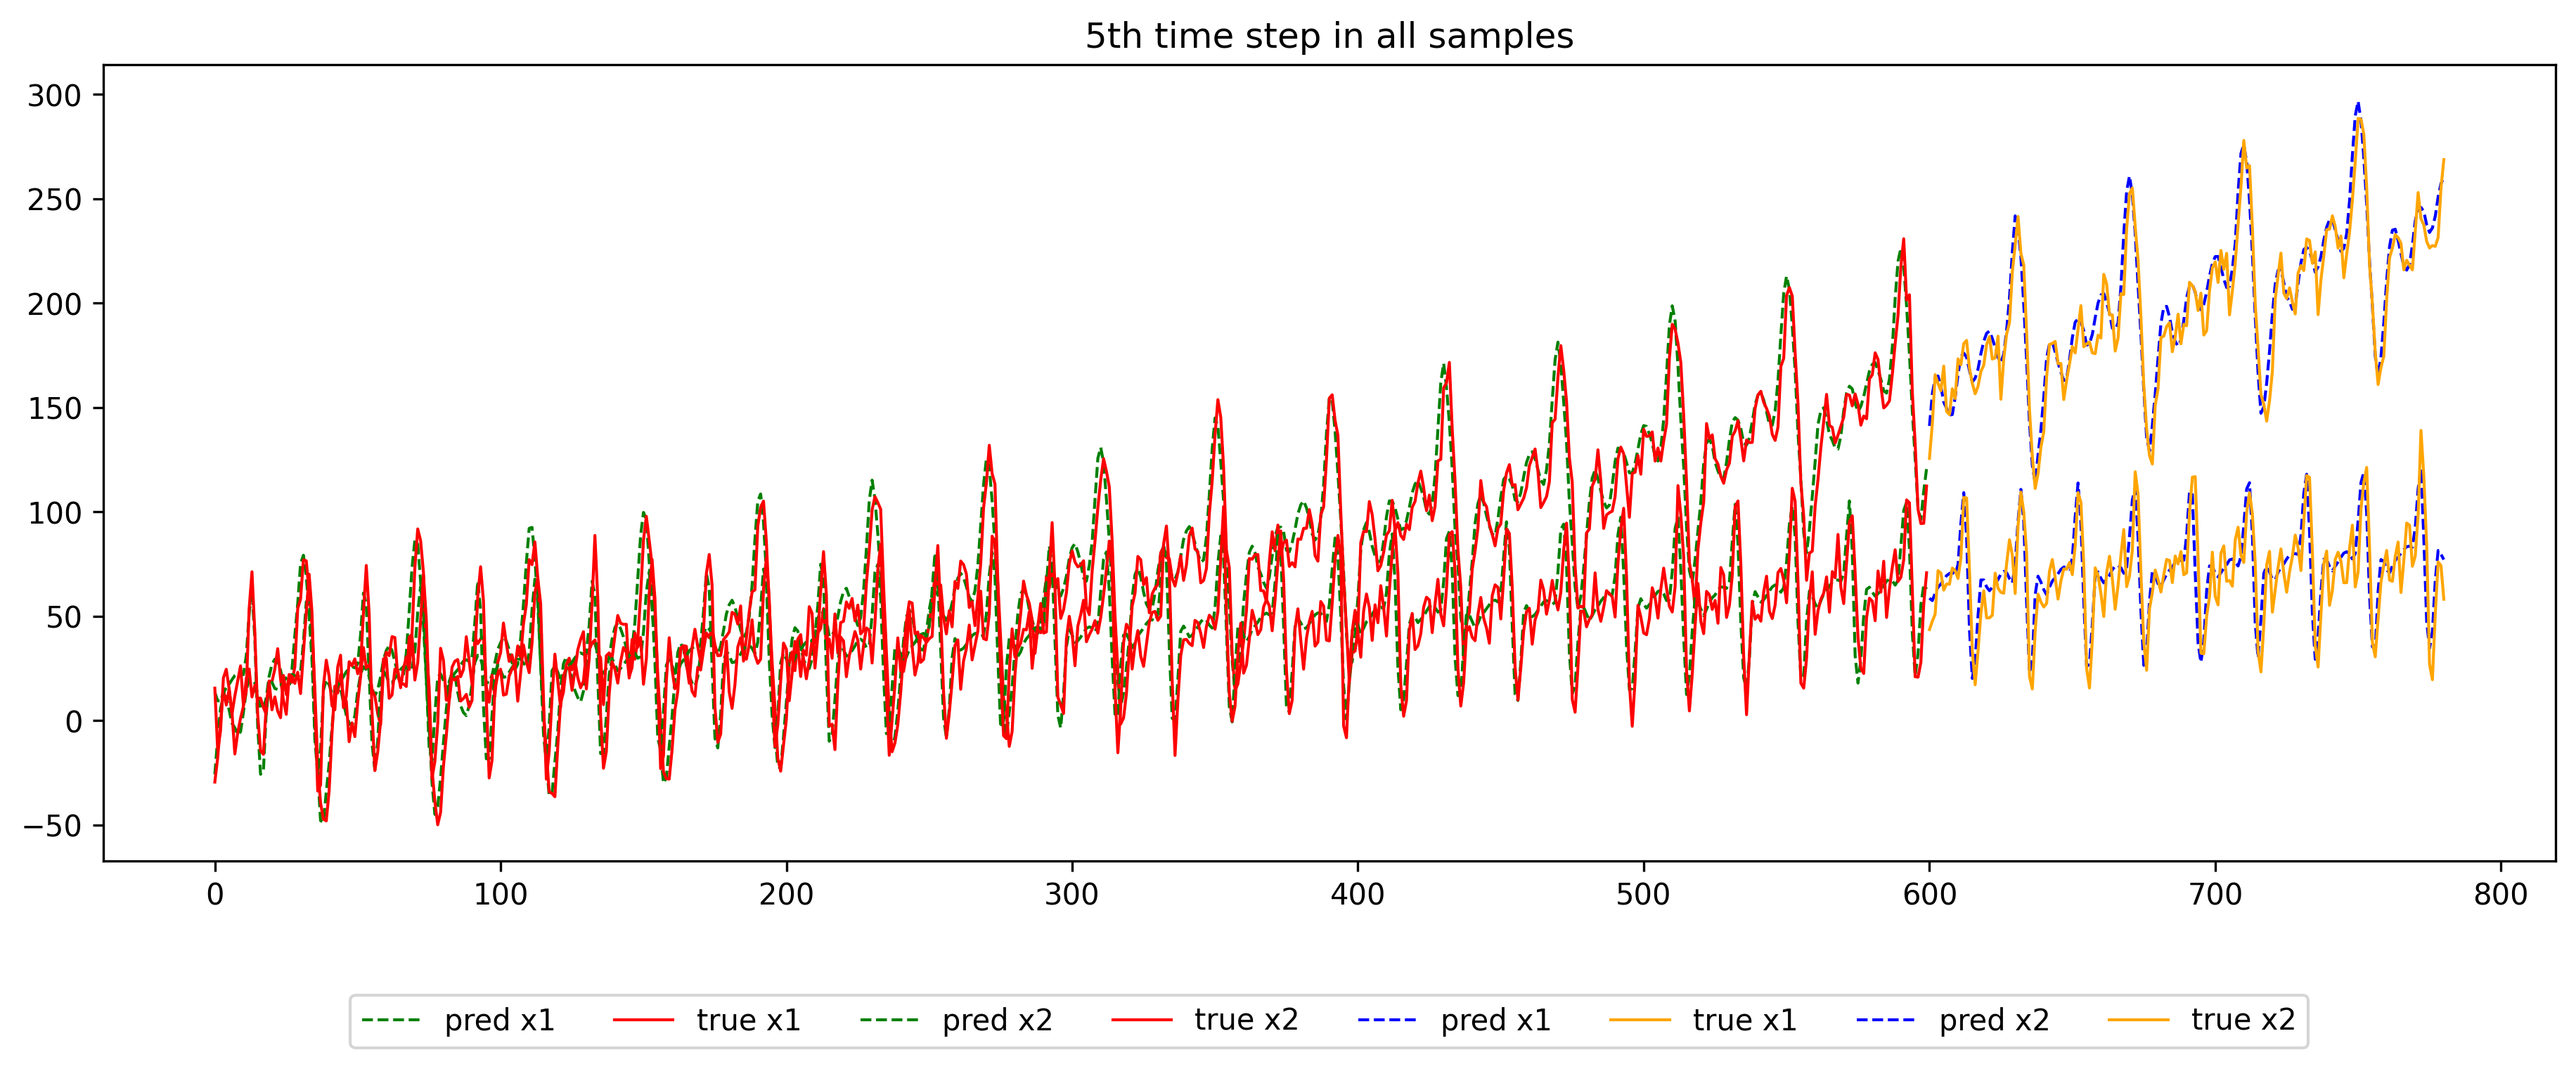

In [30]:
ith_timestep = random.choice(range(seq2seq_data_final[lb+'_pred'].shape[1]))
plt.figure(figsize=(15, 5))
train_start_t = 0
test_start_t = seq2seq_data_final['train_pred'].shape[0]
for lb, tm, clrs in zip(['train', 'test'], [train_start_t, test_start_t], 
                        [['green', 'red'], ['blue', 'orange']]):
    for i, x_lbl in zip([0, 1], ['x1', 'x2']):
        plt.plot(range(tm, tm+seq2seq_data_final[lb+'_pred'].shape[0]), 
                 seq2seq_data_final[lb+'_pred'][:, ith_timestep, i], 
                 linestyle='--', linewidth=1, color=clrs[0], label='pred '+x_lbl)
        plt.plot(range(tm, tm+seq2seq_data_final[lb+'_pred'].shape[0]), 
                 seq2seq_data_final[lb+'_true'][:, ith_timestep, i], 
                 linestyle='-', linewidth=1, color=clrs[1], label='true '+x_lbl)
    
plt.title('{}th time step in all samples'.format(ith_timestep))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=False, ncol=8)
plt.show()

Take a closer look at the prediction on test set:

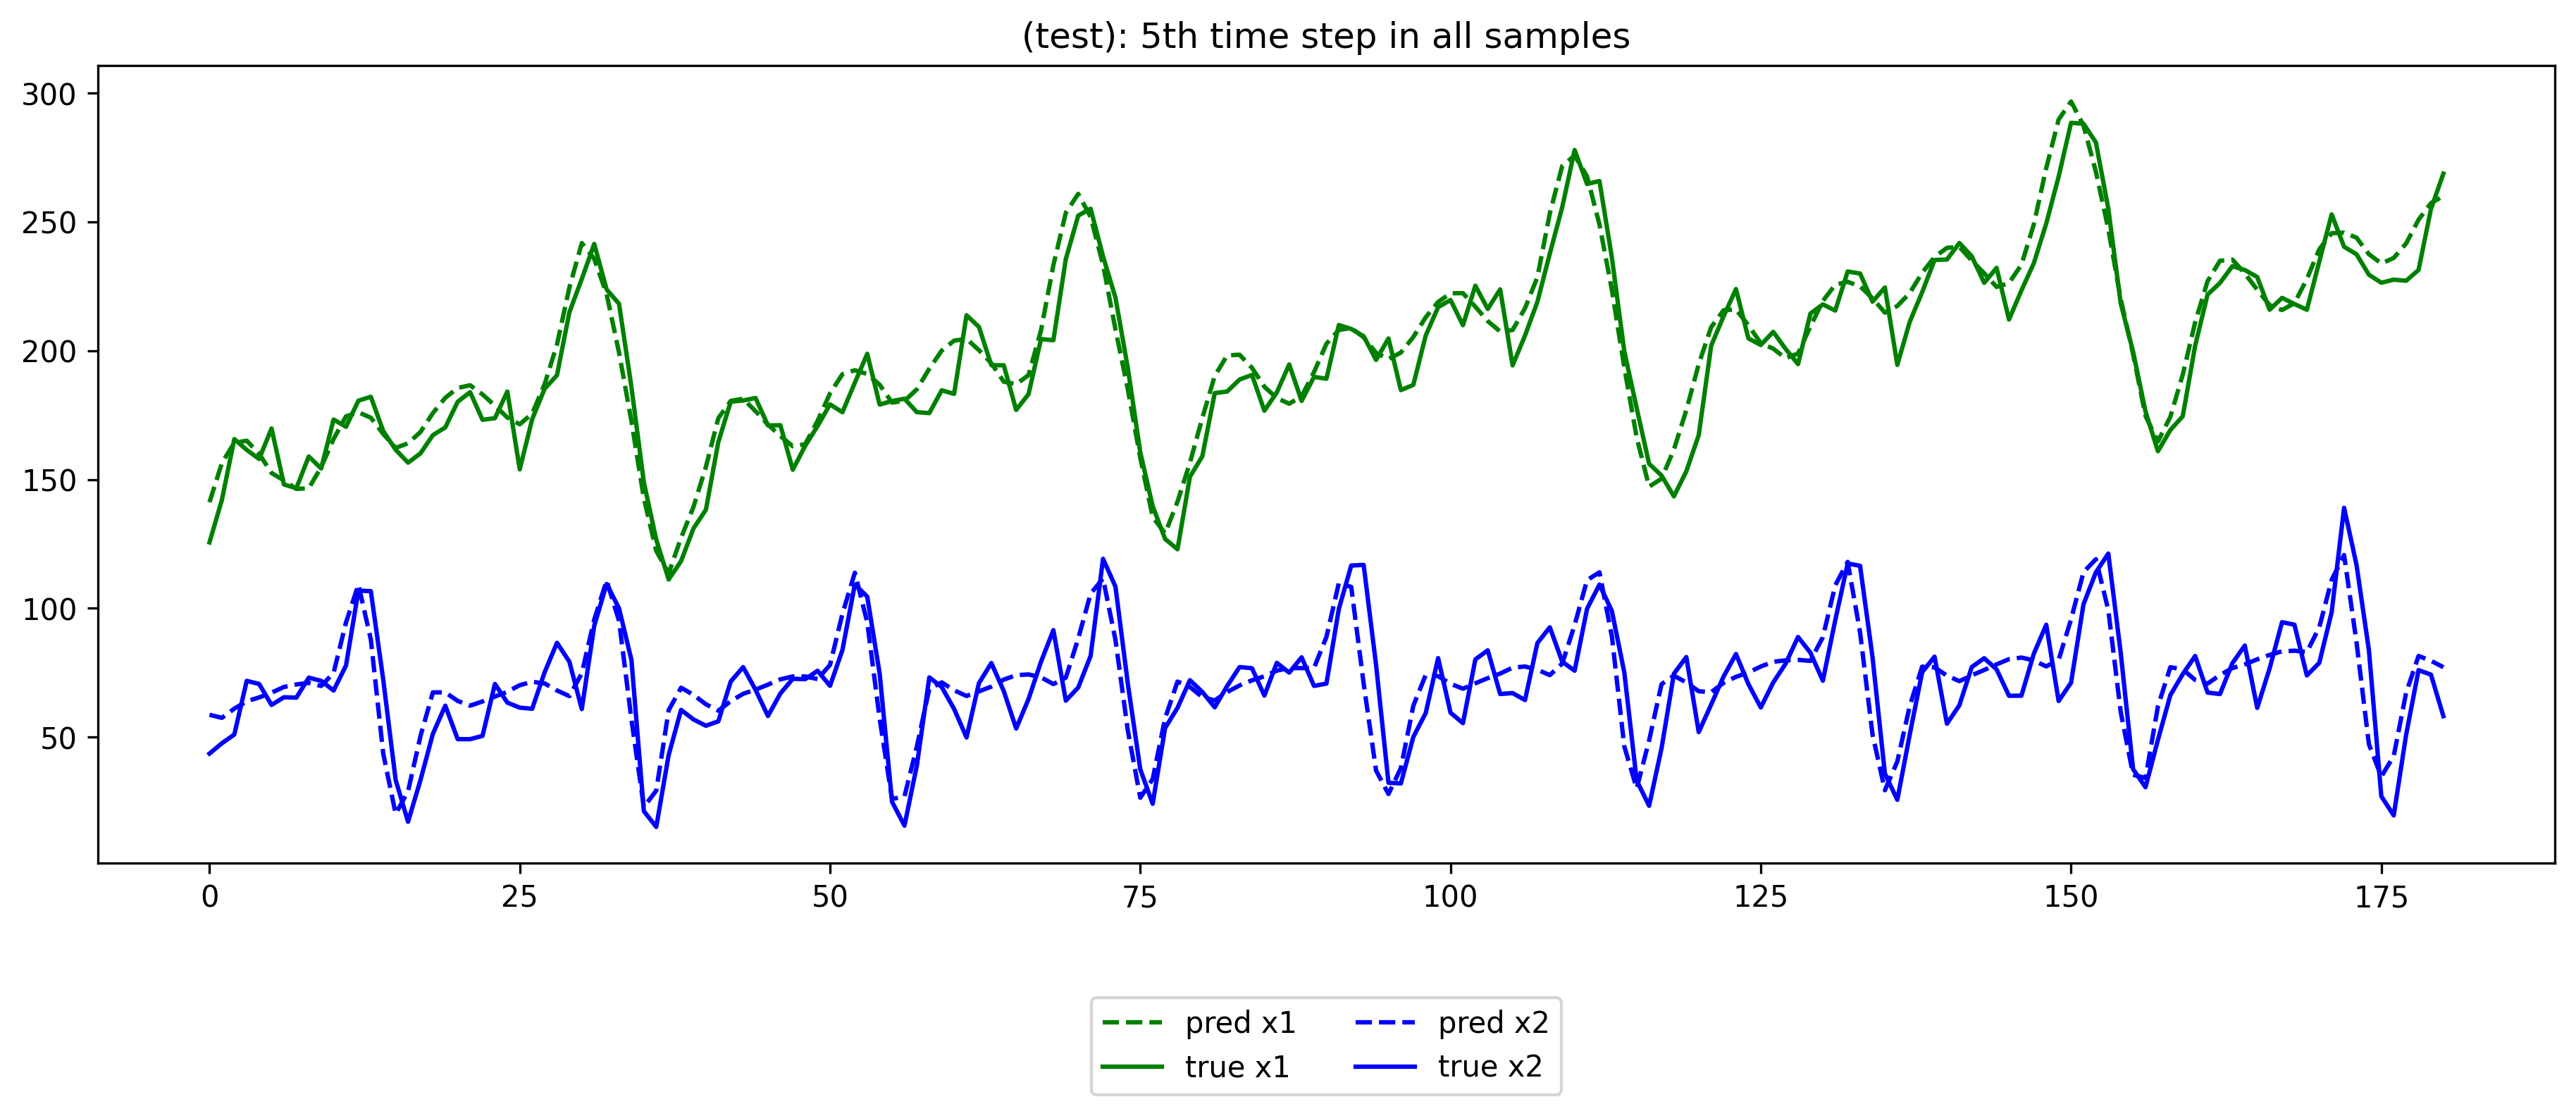

In [31]:
lb = 'test'
plt.figure(figsize=(15, 5))
for i, x_lbl, clr in zip([0, 1], ['x1', 'x2'], ['green', 'blue']):
    plt.plot(seq2seq_data_final[lb+'_pred'][:, ith_timestep, i], 
             linestyle='--', color=clr, label='pred '+x_lbl)
    plt.plot(seq2seq_data_final[lb+'_true'][:, ith_timestep, i], 
             linestyle='-', color=clr, label='true '+x_lbl)

plt.title('({}): {}th time step in all samples'.format(lb, ith_timestep))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=False, ncol=2)
plt.show()

## Seq2Seq Model with Luong Attention

![](resources/04_fig3.png "")

One of the limitations of simple Seq2Seq model is: only the last state of encoder RNN is used as input to decoder RNN. If the sequence is very long, the encoder will tend to have much weaker memory about earlier time steps. Attention mechanism can solve this problem. An attention layer is going to assign proper weight to each hidden state output from encoder, and map them to output sequence.

Next we will build Luong Attention on top of Model 1, and use Dot method to calculate alignment score.

### The Input layer

It is the same as in Model 1:

In [32]:
n_hidden = 100
luong_input_train = layers.Input(shape=(X_input_train.shape[1], X_input_train.shape[2]-1))
luong_output_train = layers.Input(shape=(X_output_train.shape[1], X_output_train.shape[2]-1))

### The encoder LSTM
This is slightly different from Model 1: besides returning the last hidden state and the last cell state, we also need to return the stacked hidden states for alignment score calculation.

In [34]:
luong_encoder_h, luong_encoder_c, luong_encoder_stack_h = get_encoder(luong_input_train, ret_seq=True)

out1: KerasTensor(type_spec=TensorSpec(shape=(None, 200, 100), dtype=tf.float32, name=None), name='lstm_4/transpose_1:0', description="created by layer 'lstm_4'")
out2: KerasTensor(type_spec=TensorSpec(shape=(None, 100), dtype=tf.float32, name=None), name='lstm_4/while:4', description="created by layer 'lstm_4'")
out3: KerasTensor(type_spec=TensorSpec(shape=(None, 100), dtype=tf.float32, name=None), name='lstm_4/while:5', description="created by layer 'lstm_4'")


### The Decoder LSTM
Next, we repeat the last hidden state of encoder 20 times, and use them as input to decoder LSTM.

In [37]:
luong_decoder_stack_h = get_decoder(luong_output_train, luong_encoder_h, luong_encoder_c)
print(luong_decoder_stack_h)

decoder: KerasTensor(type_spec=TensorSpec(shape=(None, 20, 100), dtype=tf.float32, name=None), name='lstm_5/transpose_1:0', description="created by layer 'lstm_5'")
KerasTensor(type_spec=TensorSpec(shape=(None, 20, 100), dtype=tf.float32, name=None), name='lstm_5/transpose_1:0', description="created by layer 'lstm_5'")


### Attention Layer
To build the attention layer, the first thing to do is to calculate the alignment score, and apply softmax activation function over it:

In [38]:
luong_attention = layers.dot([luong_decoder_stack_h, luong_encoder_stack_h], axes=[2, 2])
luong_attention = layers.Activation('softmax')(luong_attention)
print(luong_attention)

KerasTensor(type_spec=TensorSpec(shape=(None, 20, 200), dtype=tf.float32, name=None), name='activation/Softmax:0', description="created by layer 'activation'")


Then we can calculate the context vector, and also apply batch normalisation on top of it:

In [39]:
luong_context = layers.dot([luong_attention, luong_encoder_stack_h], axes=[2,1])
luong_context = layers.BatchNormalization(momentum=0.6)(luong_context)
print(luong_context)

KerasTensor(type_spec=TensorSpec(shape=(None, 20, 100), dtype=tf.float32, name=None), name='batch_normalization_4/batchnorm/add_1:0', description="created by layer 'batch_normalization_4'")


Now we concat the context vector and stacked hidden states of decoder, and use it as input to the last dense layer.

In [40]:
decoder_combined_context = layers.concatenate([luong_context, luong_decoder_stack_h])
print(decoder_combined_context)

luong_out = layers.TimeDistributed(layers.Dense(luong_output_train.shape[2]))(decoder_combined_context)
print(luong_out)

KerasTensor(type_spec=TensorSpec(shape=(None, 20, 200), dtype=tf.float32, name=None), name='concatenate/concat:0', description="created by layer 'concatenate'")
KerasTensor(type_spec=TensorSpec(shape=(None, 20, 2), dtype=tf.float32, name=None), name='time_distributed_2/Reshape_1:0', description="created by layer 'time_distributed_2'")


### Model building

Then we can compile the model. The parameters are the same as those in Model 1, for the sake of comparing the performance of the 2 models.

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 200, 2)]     0           []                               
                                                                                                  
 lstm_4 (LSTM)                  [(None, 200, 100),   41200       ['input_3[0][0]']                
                                 (None, 100),                                                     
                                 (None, 100)]                                                     
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 100)         400         ['lstm_4[0][1]']                 
 rmalization)                                                                               

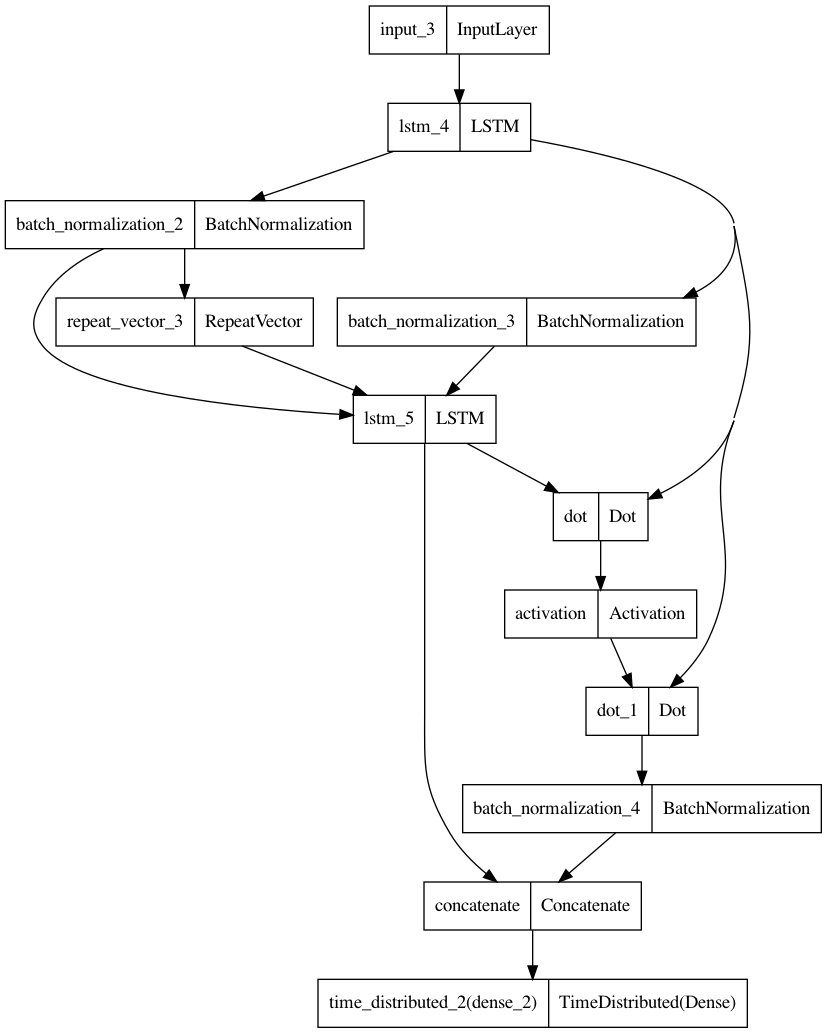

In [41]:
luong_model = Model(inputs=luong_input_train, outputs=luong_out)
luong_opt = optimizers.Adam(learning_rate=0.01, clipnorm=1)
luong_model.compile(loss='mean_squared_error', optimizer=luong_opt, metrics=['mae'])
luong_model.summary()
plot_model(luong_model)

### Training

In [42]:
epc = 50
es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = luong_model.fit(X_input_train[:, :, :2], X_output_train[:, :, :2], validation_split=0.2, 
                    epochs=epc, verbose=1, callbacks=[es], 
                    batch_size=100)
luong_train_mae = history.history['mae']
luong_valid_mae = history.history['val_mae']
 
luong_model.save('data/luong_model_forecasting_seq2seq.h5')

Epoch 1/50
5/5 [==============================] - 10s 696ms/step - loss: 0.9434 - mae: 0.5702 - val_loss: 0.1426 - val_mae: 0.2747
Epoch 2/50
5/5 [==============================] - 3s 727ms/step - loss: 0.1381 - mae: 0.2773 - val_loss: 0.1385 - val_mae: 0.2722
Epoch 3/50
5/5 [==============================] - 3s 689ms/step - loss: 0.1290 - mae: 0.2656 - val_loss: 0.1303 - val_mae: 0.2642
Epoch 4/50
5/5 [==============================] - 4s 719ms/step - loss: 0.1174 - mae: 0.2528 - val_loss: 0.1157 - val_mae: 0.2501
Epoch 5/50
5/5 [==============================] - 3s 592ms/step - loss: 0.1125 - mae: 0.2501 - val_loss: 0.1075 - val_mae: 0.2411
Epoch 6/50
5/5 [==============================] - 3s 640ms/step - loss: 0.1042 - mae: 0.2406 - val_loss: 0.0954 - val_mae: 0.2318
Epoch 7/50
5/5 [==============================] - 3s 581ms/step - loss: 0.0992 - mae: 0.2345 - val_loss: 0.1208 - val_mae: 0.2513
Epoch 8/50
5/5 [==============================] - 3s 599ms/step - loss: 0.0908 - mae: 0.2

The training and evaluation process is the same as illustrated in Model 1. After training for 100 epochs (the same number of training epochs as Model 1), we can evaluate the result.

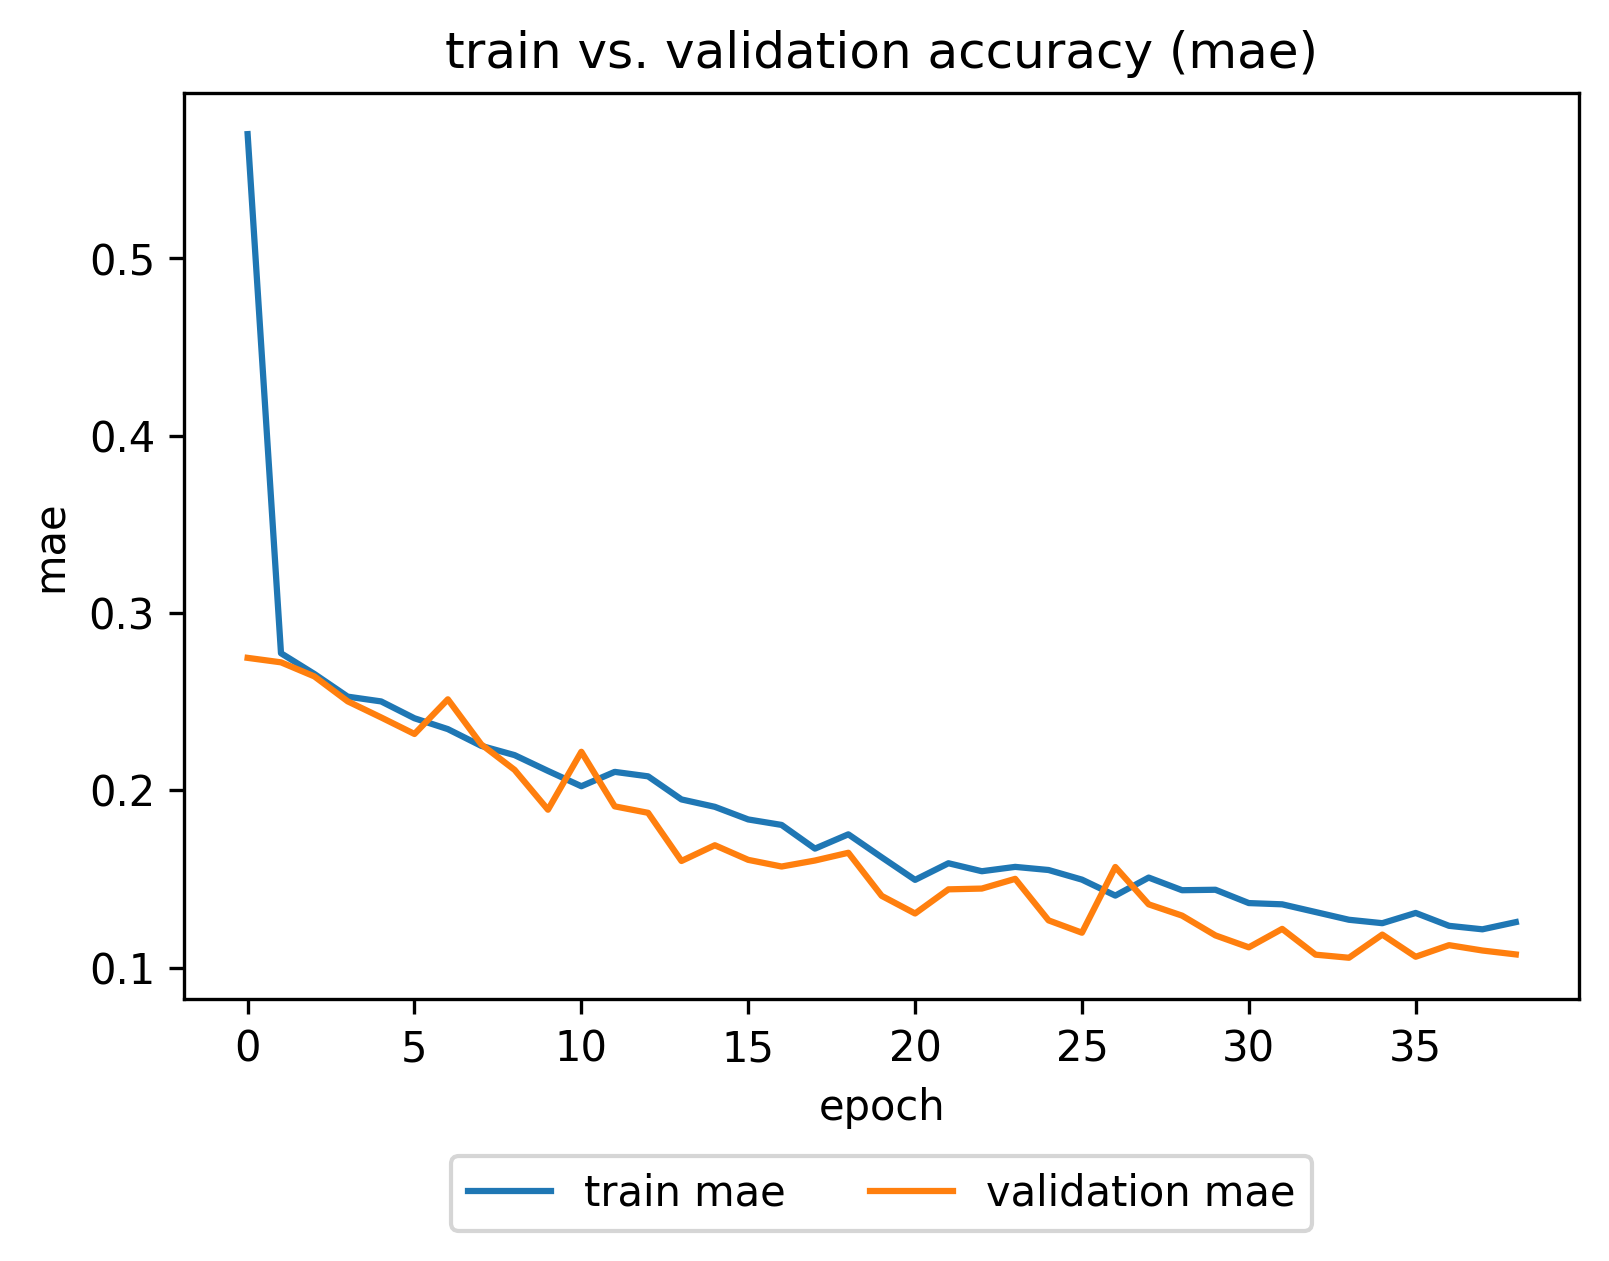

In [43]:
plt.plot(luong_train_mae, label='train mae'), 
plt.plot(luong_valid_mae, label='validation mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.title('train vs. validation accuracy (mae)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, 
           shadow=False, ncol=2)
plt.show()

### Prediction (evaluation)

Below are the plots of sample MAE vs. sample order for train set and test set. Again, the model is not sufficiently trained since we can still see some periodical pattern. But for easier comparison of the 2 models, we are not going to train it more for now. Note that the overall MAE of both train set and test set are slightly improved compare to Model 1.

In [44]:
luong_data_final = check_predictions(luong_model)

(600, 20, 2) (181, 20, 2)
(600, 20, 2) (181, 20, 2)
(600, 20, 3) (181, 20, 3)
(600, 20, 3) (181, 20, 3)
train_pred: (600, 20, 2)
train_true: (600, 20, 2)
test_pred: (181, 20, 2)
test_true: (181, 20, 2)


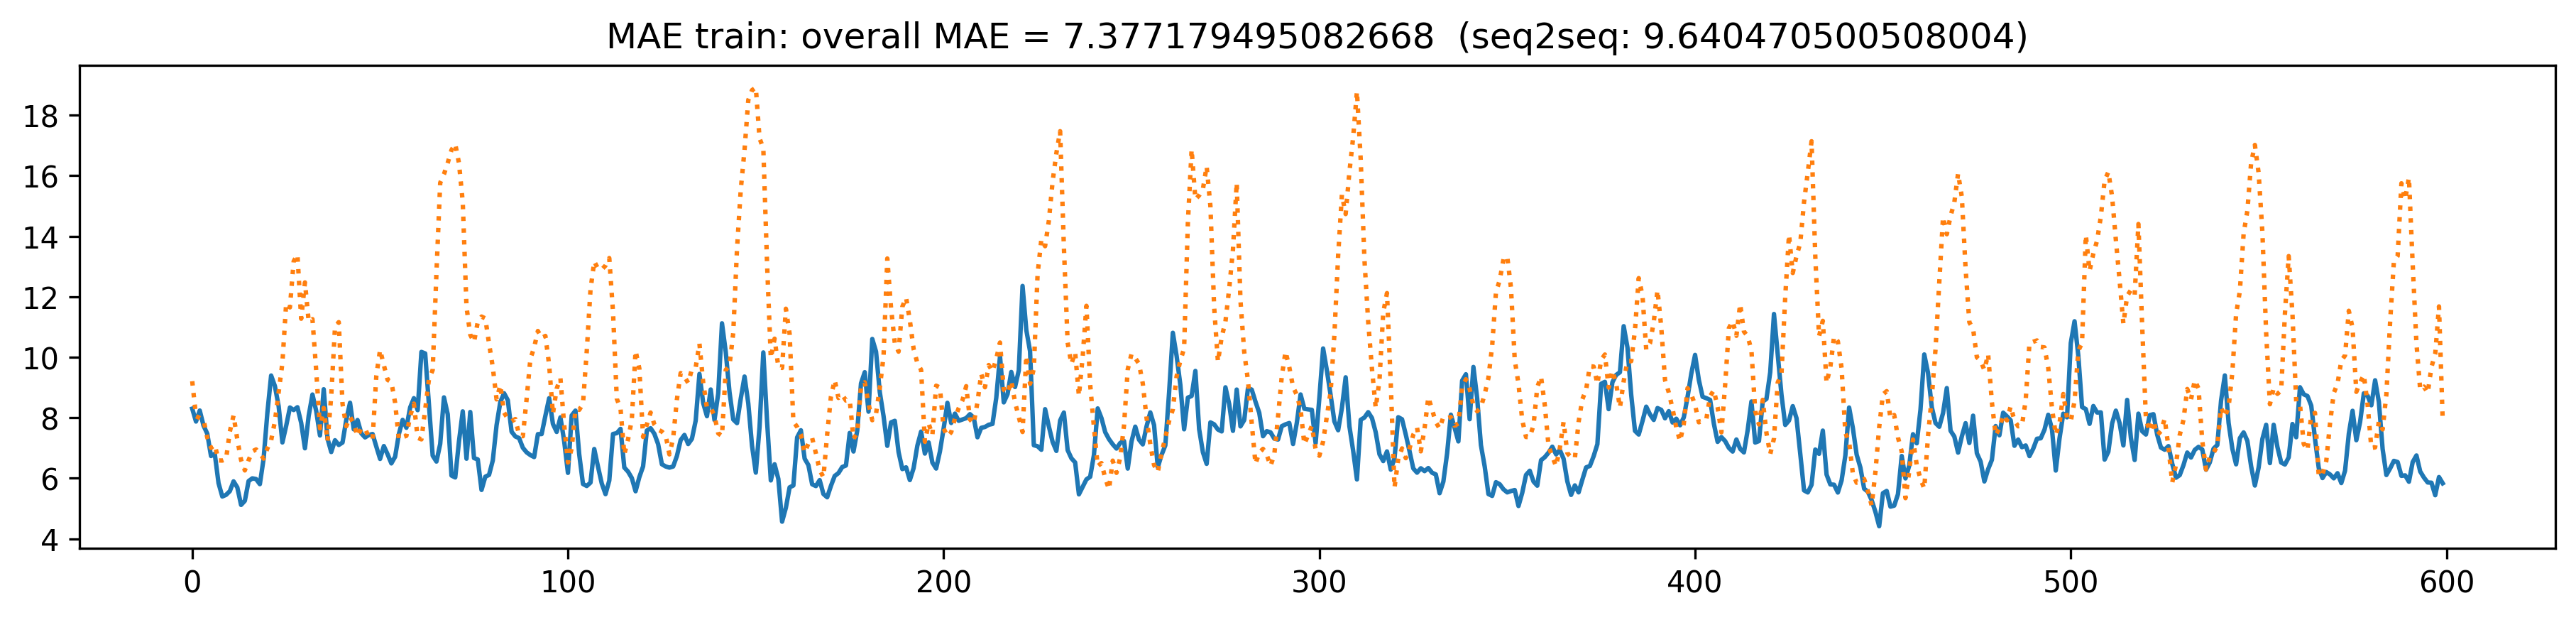

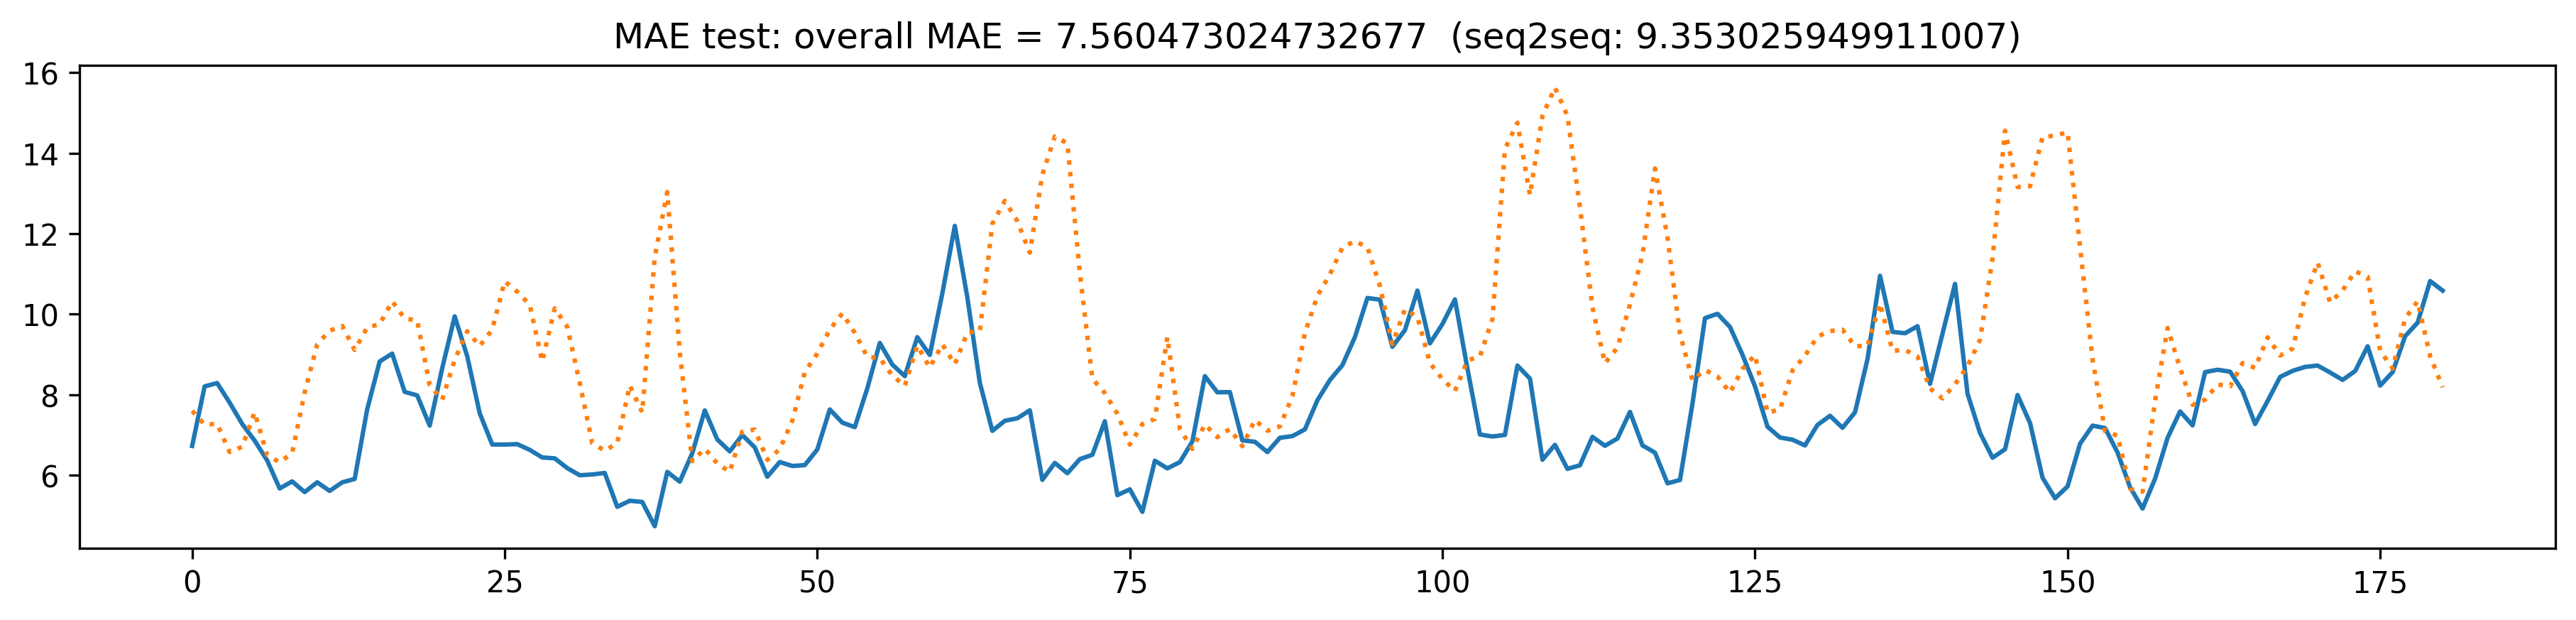

In [47]:
for lb in ['train', 'test']:
    s2s_MAE_overall = abs(seq2seq_data_final[lb+'_pred'] - seq2seq_data_final[lb+'_true']).mean()
    s2s_MAE_ = abs(seq2seq_data_final[lb+'_pred'] - seq2seq_data_final[lb+'_true']).mean(axis=(1, 2))
    luo_MAE_overall = abs(luong_data_final[lb+'_pred'] - luong_data_final[lb+'_true']).mean()
    luo_MAE_ = abs(luong_data_final[lb+'_pred'] - luong_data_final[lb+'_true']).mean(axis=(1, 2))
    plt.figure(figsize=(15, 3))
    plt.plot(luo_MAE_)
    plt.plot(s2s_MAE_, ':')
    plt.title('MAE '+lb+': overall MAE = '+str(luo_MAE_overall)+
              '  (seq2seq: '+str(s2s_MAE_overall)+')')
    plt.show()

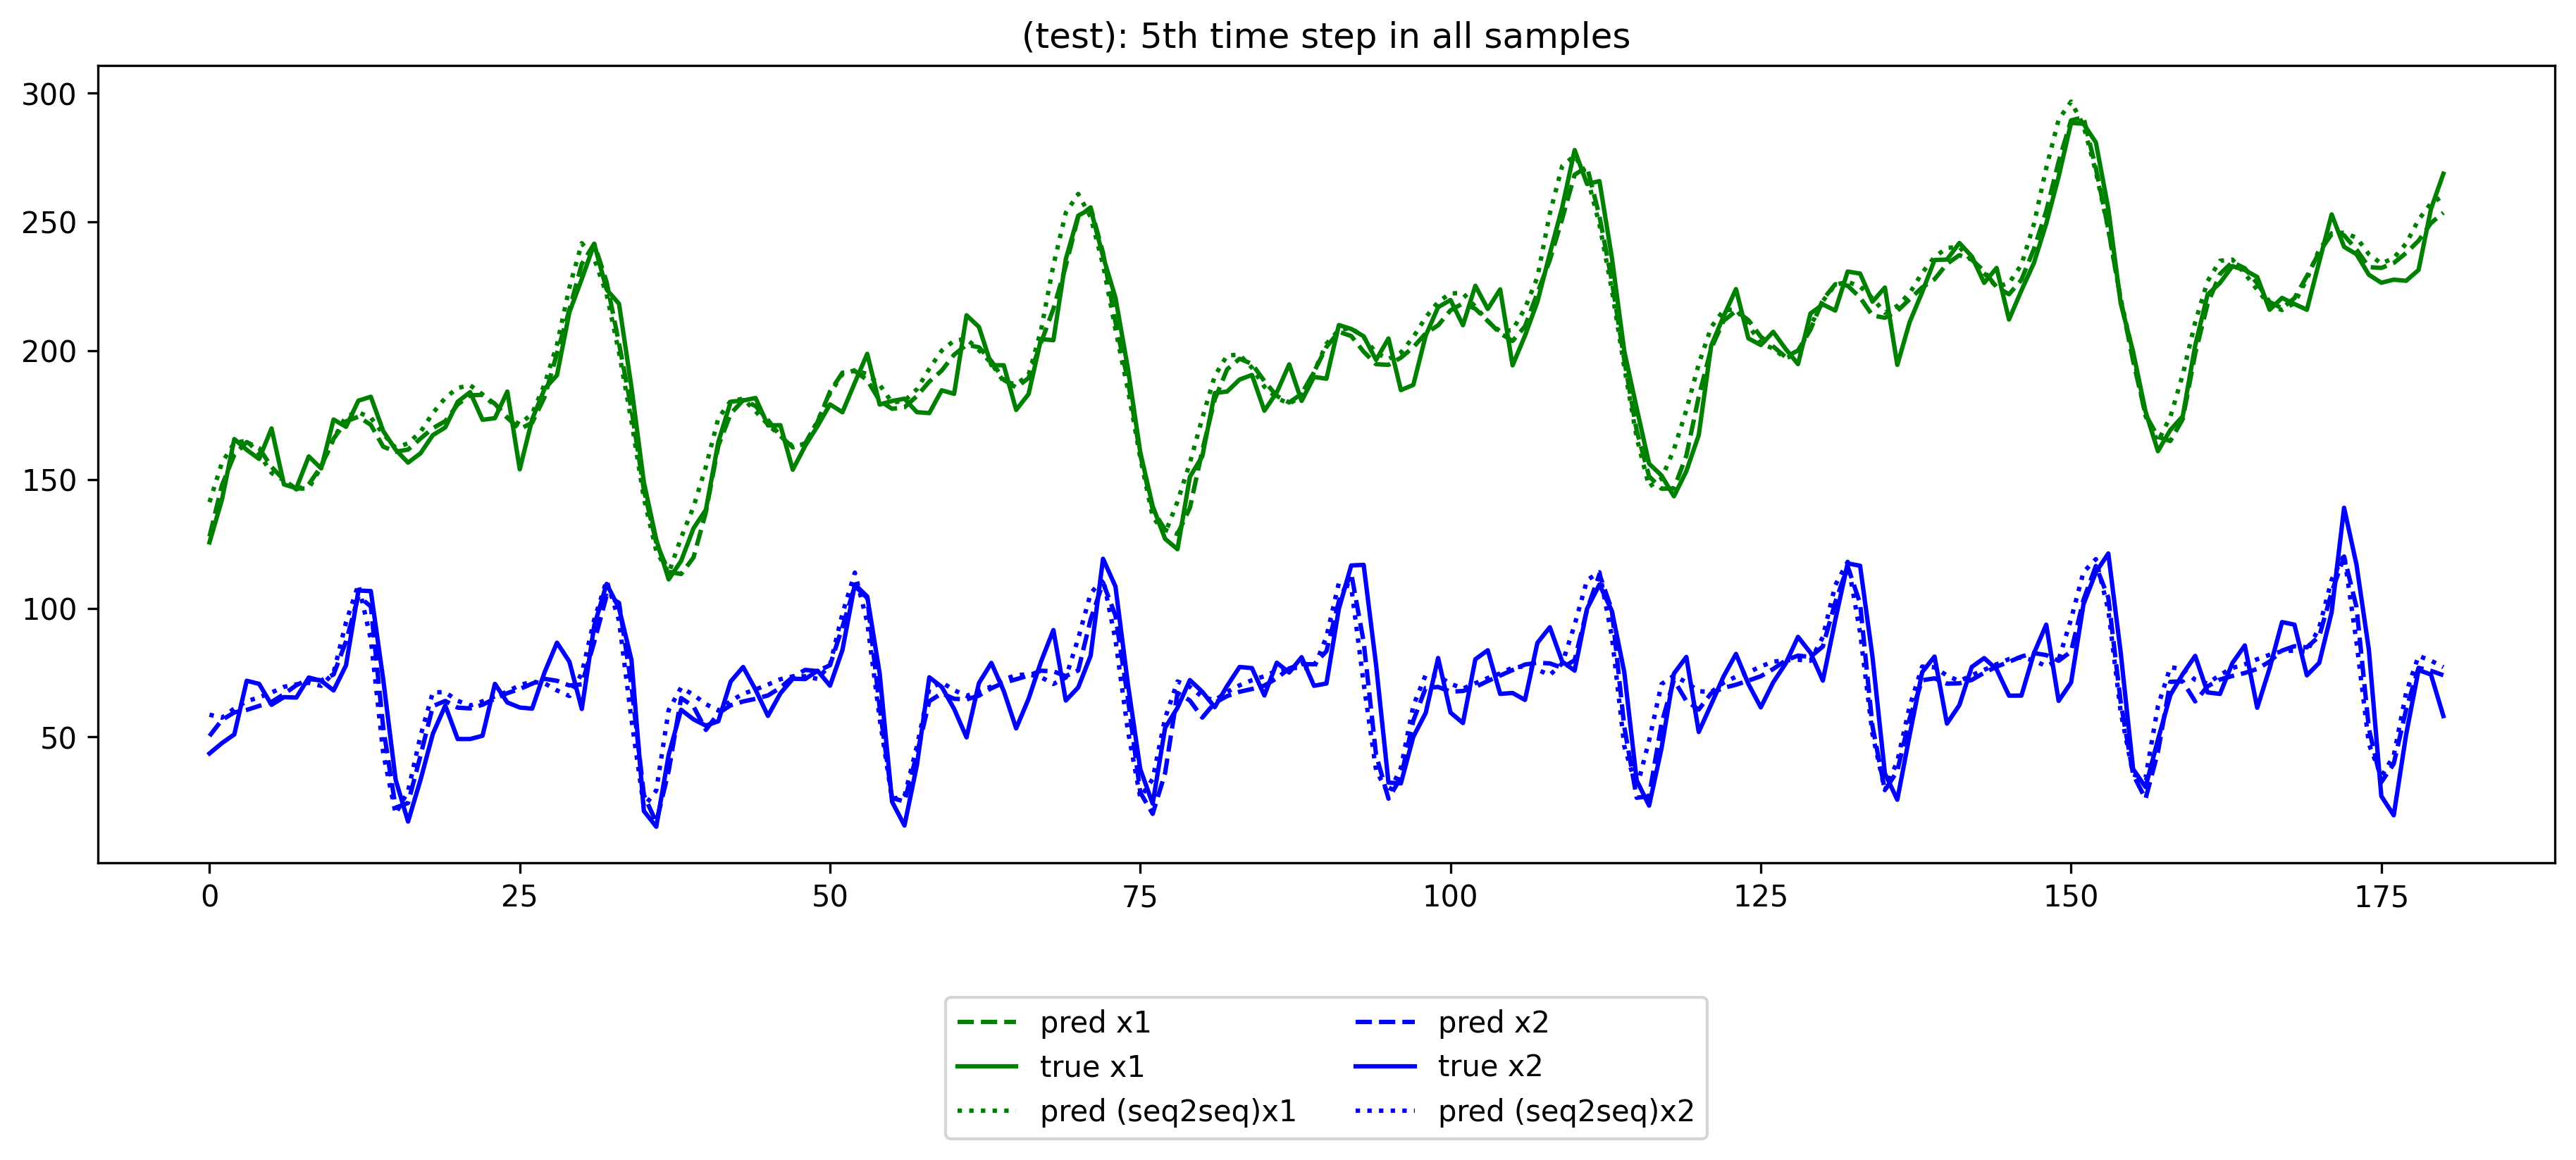

In [45]:
lb = 'test'
plt.figure(figsize=(15, 5))
for i, x_lbl, clr in zip([0, 1], ['x1', 'x2'], ['green', 'blue']):
    plt.plot(luong_data_final[lb+'_pred'][:, ith_timestep, i], linestyle='--', color=clr, label='pred '+x_lbl)
    plt.plot(luong_data_final[lb+'_true'][:, ith_timestep, i], linestyle='-', color=clr, label='true '+x_lbl)
    plt.plot(seq2seq_data_final[lb+'_pred'][:, ith_timestep, i], linestyle=':', color=clr, label='pred (seq2seq)'+x_lbl)
plt.title('({}): {}th time step in all samples'.format(lb, ith_timestep))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=False, ncol=2)
plt.show()